# Business Problem

Penjelasan Fraud disini

# Penjelasan Variabel

Penjelasan variabel ada di file `LCDataDictionary.xlsx`

# Import Library

In [249]:
# Pandas
import pandas as pd
pd.set_option("display.max_columns",None)

# Numpy
import numpy as np

# Visual
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Stats
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import ttest_ind
from feature_engine.outliers import Winsorizer

#Sklearn
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


#balancing
from imblearn.over_sampling import ADASYN

# Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn import metrics
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_auc_score,
                             confusion_matrix,
                             classification_report,
                             roc_curve)
from sklearn.metrics import ConfusionMatrixDisplay
from yellowbrick.classifier import ROCAUC
from sklearn.model_selection import cross_val_score
import dalex as dx

#Deployment
import pickle

# Ignoring warning
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [84]:
loan_data = pd.read_csv("loan_data_2007_2014.csv")

# Cek Data

In [85]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Melihat head dari dataframe terdapat beberapa kolom yang harus dilakukan formatting
- kolom term perlu diubah ke integer
- kolom emp_length perlu dirubah ke integer

In [86]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Melihat dari info tipe data tiap variabel perlu dilakukan perbaikan format datetime karena tipe data pada datafram info masih object

In [87]:
loan_data.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [88]:
loan_data.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

Rule of thumb jika presentase missing value pada suatu variabel daiats 30% maka varaibel tersebut diremove dari dataset

In [89]:
loan_data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

# Fixing Format

### Merubah kolom emp_length dan term

In [90]:
# Convert term month to numerical data
loan_data['term_month'] = loan_data.term.str.rsplit(' ').str[1]
loan_data['term_month'] = loan_data['term_month'].astype(int)
loan_data.drop('term', axis=1, inplace=True)

In [91]:
# Convert emp_length to numerical data
loan_data['emp_length'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace('< 1 year', str(0))
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' year', '')
loan_data['emp_length'] = loan_data['emp_length'].astype(float)

### Merubah tipe data pada string yang seharusnya datetime

In [92]:
#Change string to dateformat
fixdate = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d','next_pymnt_d']
for col in fixdate:
    loan_data[col] = pd.to_datetime(loan_data[col], format='%b-%y')
    loan_data[col] = loan_data[col].dt.strftime('%Y-%m')
    loan_data[col] = pd.to_datetime(loan_data[col], format='%Y-%m')

In [93]:
loan_data.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,term_month
0,0,1077501,1296599,5000,5000,4975.0,10.65,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,2015-01-01,171.62,NaT,2016-01-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36
1,1,1077430,1314167,2500,2500,2500.0,15.27,59.83,C,C4,Ryder,0.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60


# Remove kolom yang dianggap useless

In [94]:
cols_to_drop = [
    # Similiar
    'Unnamed: 0',
    'member_id',
    
    # Text 
    'url',
    'desc',

    # undefined
    'zip_code',
    # sudah digantikan dengan grade
    'sub_grade'
]

In [95]:
loan_data.drop(cols_to_drop, axis=1, inplace=True)

In [96]:
loan_data.shape

(466285, 69)

# Handling Missing Value

Rule of thumb jika presentase missing value pada suatu variabel daiats 30% maka varaibel tersebut diremove dari dataset

In [97]:
loan_data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
 

In [98]:
cols_to_drop = []
for col in loan_data:
    if loan_data[col].isnull().sum()/len(loan_data[col])>0.3:
        print("drop column",col)
        cols_to_drop.append(col)
    else:
        print('Dont drop column',col)

Dont drop column id
Dont drop column loan_amnt
Dont drop column funded_amnt
Dont drop column funded_amnt_inv
Dont drop column int_rate
Dont drop column installment
Dont drop column grade
Dont drop column emp_title
Dont drop column emp_length
Dont drop column home_ownership
Dont drop column annual_inc
Dont drop column verification_status
Dont drop column issue_d
Dont drop column loan_status
Dont drop column pymnt_plan
Dont drop column purpose
Dont drop column title
Dont drop column addr_state
Dont drop column dti
Dont drop column delinq_2yrs
Dont drop column earliest_cr_line
Dont drop column inq_last_6mths
drop column mths_since_last_delinq
drop column mths_since_last_record
Dont drop column open_acc
Dont drop column pub_rec
Dont drop column revol_bal
Dont drop column revol_util
Dont drop column total_acc
Dont drop column initial_list_status
Dont drop column out_prncp
Dont drop column out_prncp_inv
Dont drop column total_pymnt
Dont drop column total_pymnt_inv
Dont drop column total_rec_

Berikut adalah kolom yang missing value diatas 30% dan akan dilakukan drop

In [99]:
cols_to_drop

['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

### Drop coloumn cz just have 1 value unique

In [100]:
for col in loan_data:
    if loan_data[col].nunique() == 1:
        cols_to_drop.append(col)

Berikut kolom yang akan di drop

In [101]:
cols_to_drop

['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'policy_code',
 'application_type']

In [102]:
loan_data.drop(cols_to_drop, axis=1, inplace=True)

In [103]:
loan_data.shape

(466285, 46)

### Handling missing value dengan mengisi nilai 0

In [104]:
loan_data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'term_month'],
      dtype='object')

In [105]:
tipedatanumerikal = []
tipedatakategorikal = []
other = []
for col in loan_data:
    if loan_data[col].isnull().sum() > 0:
        if loan_data[col].dtypes == 'object':
            tipedatakategorikal.append(col)
        elif loan_data[col].dtype == 'datetime64[ns]':
            other.append(col)
        else:
            tipedatanumerikal.append(col)

In [106]:
loan_data['total_acc'].describe()

count    466256.000000
mean         25.064430
std          11.600141
min           1.000000
25%          17.000000
50%          23.000000
75%          32.000000
max         156.000000
Name: total_acc, dtype: float64

In [107]:
loan_data[tipedatanumerikal].head()

,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,10.0,24000.0,0.0,1.0,3.0,0.0,83.7,9.0,0.0,0.0,NaN,NaN,NaN
1,0.0,30000.0,0.0,5.0,3.0,0.0,9.4,4.0,0.0,0.0,NaN,NaN,NaN
2,10.0,12252.0,0.0,2.0,2.0,0.0,98.5,10.0,0.0,0.0,NaN,NaN,NaN
3,10.0,49200.0,0.0,1.0,10.0,0.0,21.0,37.0,0.0,0.0,NaN,NaN,NaN
4,1.0,80000.0,0.0,0.0,15.0,0.0,53.9,38.0,0.0,0.0,NaN,NaN,NaN


In [108]:
loan_data[tipedatanumerikal].isnull().sum()

emp_length                    21008
annual_inc                        4
delinq_2yrs                      29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_util                      340
total_acc                        29
collections_12_mths_ex_med      145
acc_now_delinq                   29
tot_coll_amt                  70276
tot_cur_bal                   70276
total_rev_hi_lim              70276
dtype: int64

In [109]:
loan_data_fillna0 = [
    'emp_length',
    'delinq_2yrs',
    'inq_last_6mths',
    'open_acc',
    'pub_rec',
    'revol_util',
    'collections_12_mths_ex_med',
    'acc_now_delinq',
    'tot_coll_amt',
    'tot_cur_bal',
    'total_rev_hi_lim'
]
loan_data_fillna1 = [
    'total_acc'
]

loan_data_fillnaskew = [
    'annual_inc'
]

In [110]:
for col in loan_data:
    if col in loan_data_fillna0:
        loan_data[col].fillna(0, inplace=True)
    elif col in loan_data_fillna1:
        loan_data[col].fillna(1, inplace=True)
    elif col in loan_data_fillnaskew:
        skewvalue = loan_data[col].skew(axis=0, skipna=True)
        if skewvalue <=0.5 and skewvalue >= -0.5:
            loan_data[col].fillna(value=loan_data[col].mean(), inplace=True)
        else:
            loan_data[col].fillna(value=loan_data[col].median(), inplace=True)

In [111]:
loan_data[tipedatanumerikal].isnull().sum()

emp_length                    0
annual_inc                    0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_util                    0
total_acc                     0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
dtype: int64

karena data kategori pada emp_title sangat banyak yang uniq dan berbeda maka saya drop kolom, 
karena pada title banyak yang other dan jumlah missing value hanya 20 maka saya drop baris

In [112]:
loan_data.shape

(466285, 46)

Drop Column

In [113]:
loan_data.drop('emp_title', axis=1, inplace=True)

Drop Row

In [114]:
loan_data.dropna(how='any', axis=0, inplace=True)

In [115]:
loan_data.isnull().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
title                         0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_re

# Handling Outlier

https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/

Despite all this, as much as you’d like to, it is NOT acceptable to drop an observation just because it is an outlier.  They can be legitimate observations and are sometimes the most interesting ones.  It’s important to investigate the nature of the outlier before deciding.

jadi harus dianalisa terlebih dahulu mengenai variabel yang outlier, tidak bisa memutuskan secara pihakh harus drop row tersebut karena outlier

In [116]:
def diagnostic_plots(df, variabel):
    
    # figure size
    plt.figure(figsize=(16,4))
    
    #histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variabel], bins=30)
    
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variabel], dist='norm', plot=plt)
    plt.ylabel('RM quantiles')
    
    #boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variabel])
    plt.title('Boxplot')
    
    plt.show()

In [117]:
num = loan_data.select_dtypes('number')
numerikal = []
for i in num.columns:
    numerikal.append(i)

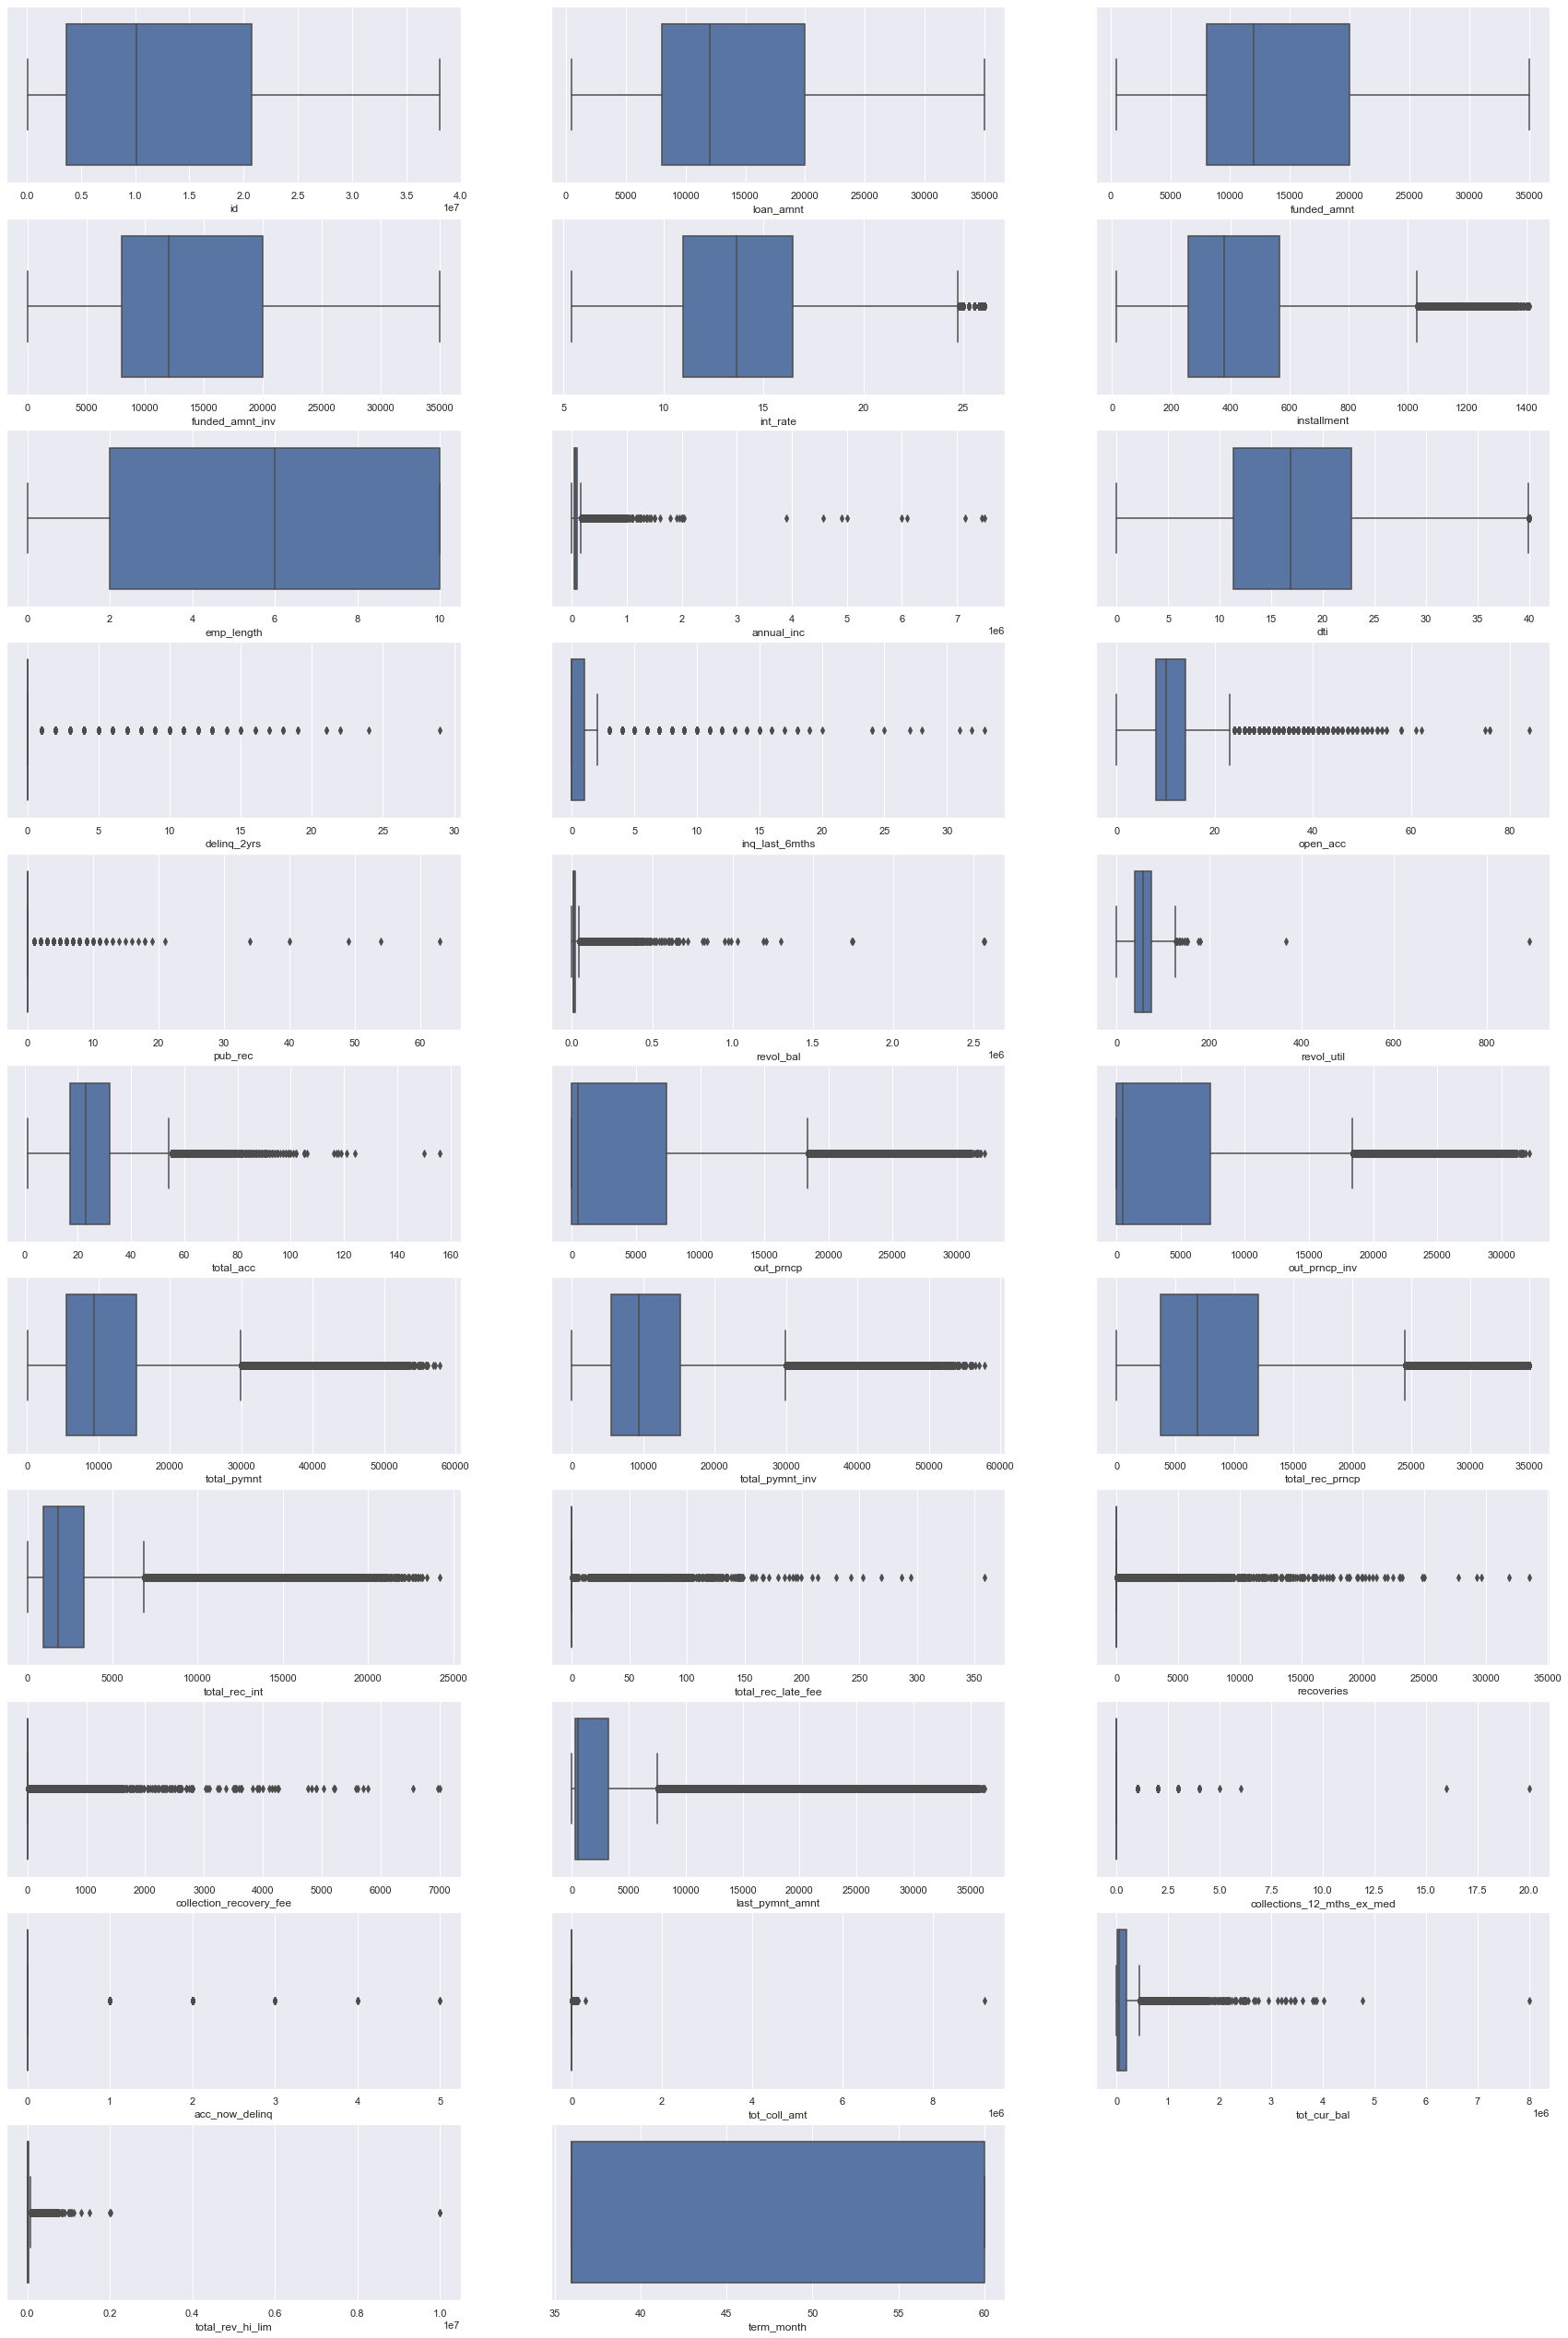

In [118]:
plt.figure(figsize=(30,50))
for i in range(len(numerikal)):
    plt.subplot(12,3,i+1)
    sns.boxplot(loan_data[numerikal[i]])
    plt.tight_layout
plt.show()

id


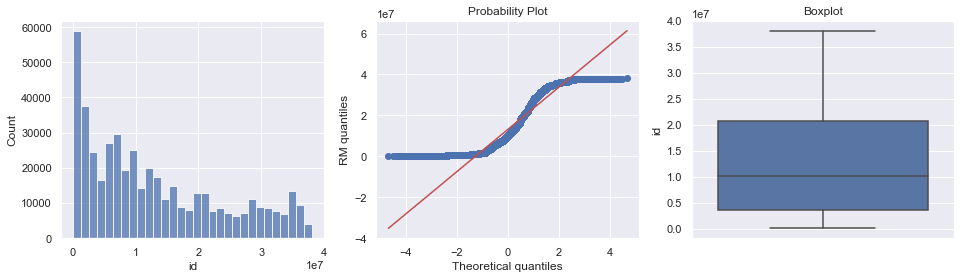

loan_amnt


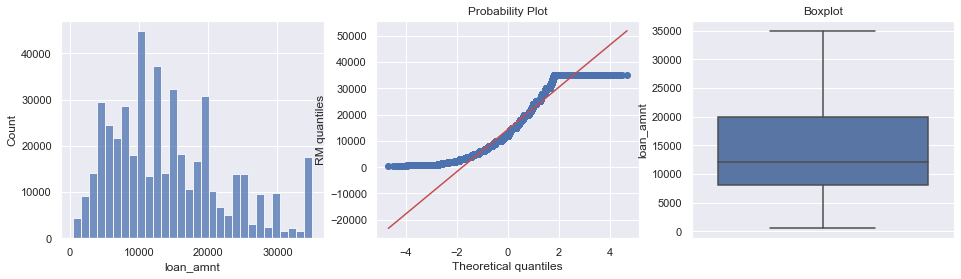

funded_amnt


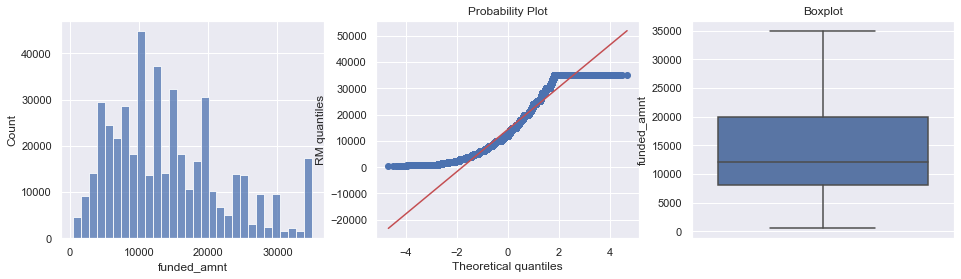

funded_amnt_inv


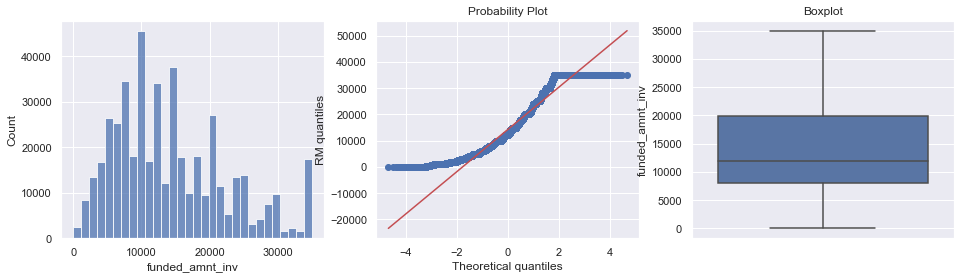

int_rate


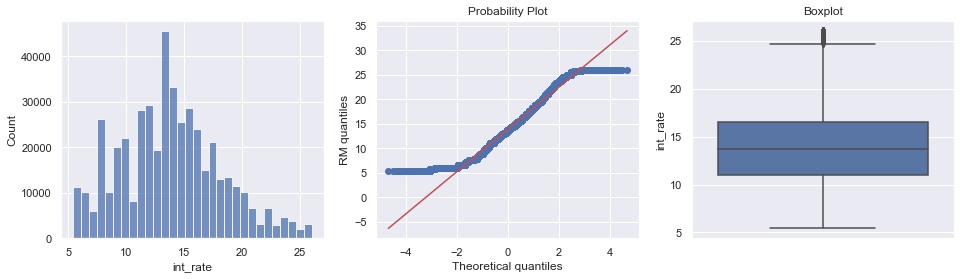

installment


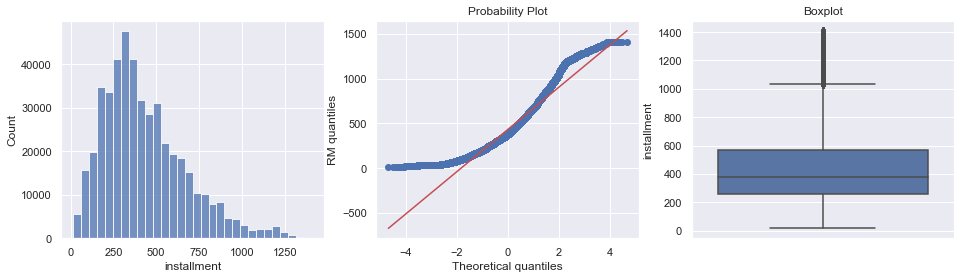

emp_length


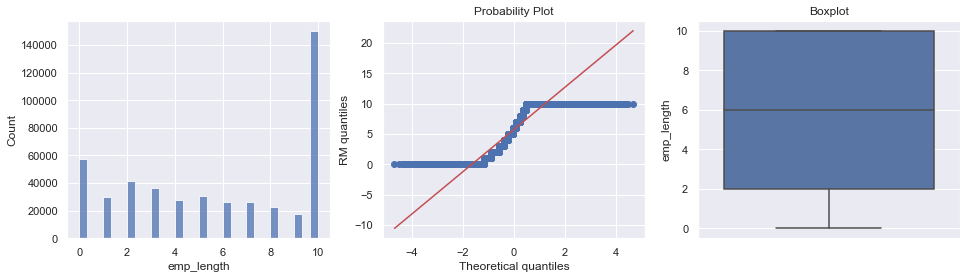

annual_inc


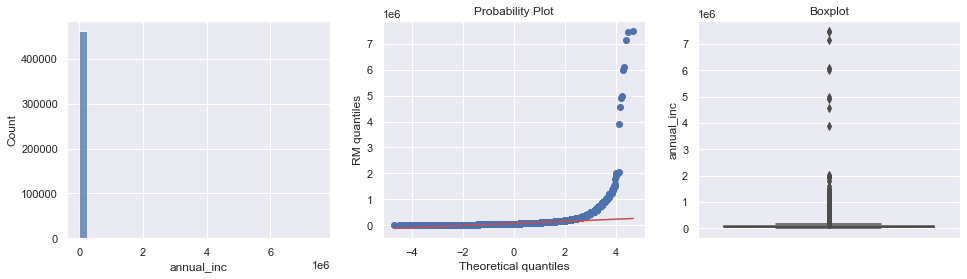

dti


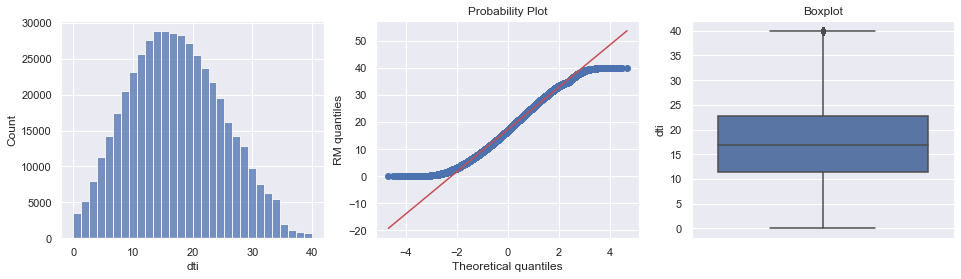

delinq_2yrs


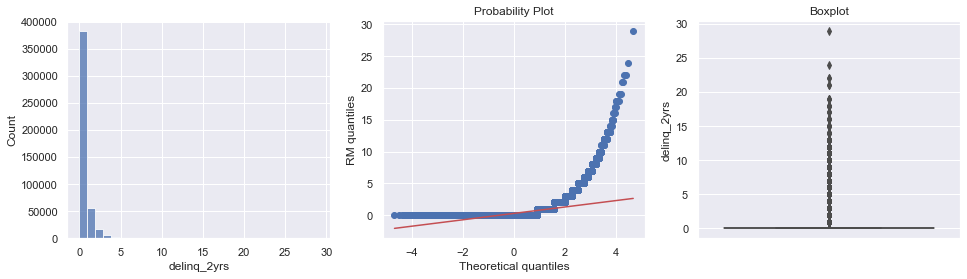

inq_last_6mths


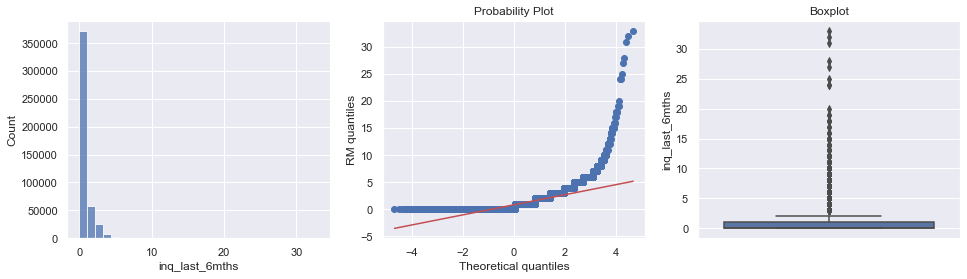

open_acc


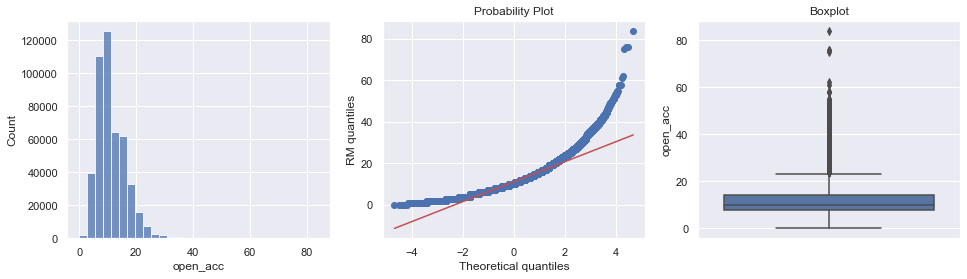

pub_rec


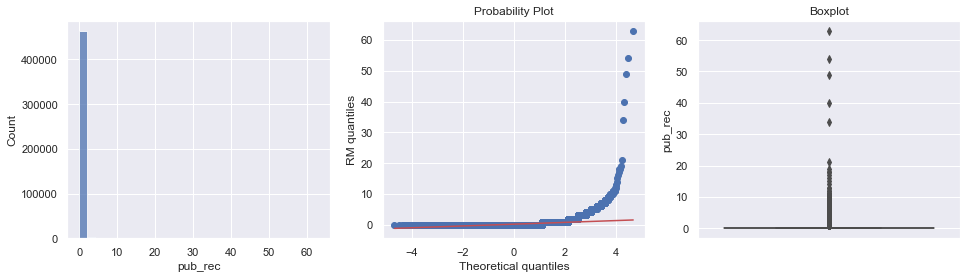

revol_bal


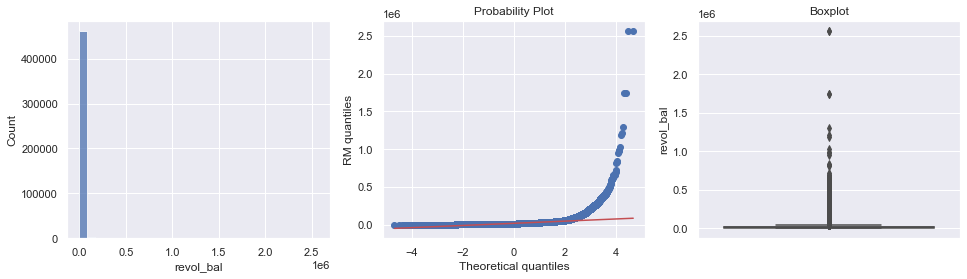

revol_util


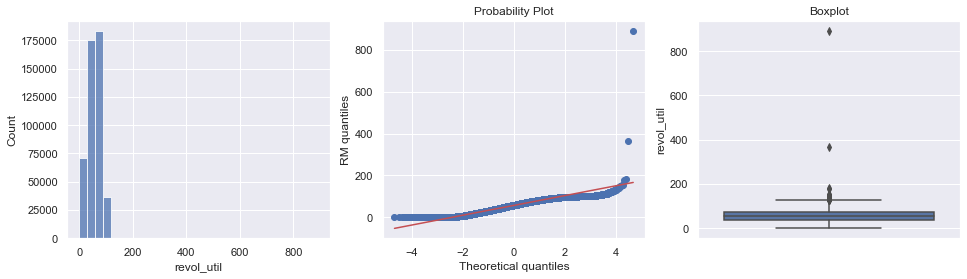

total_acc


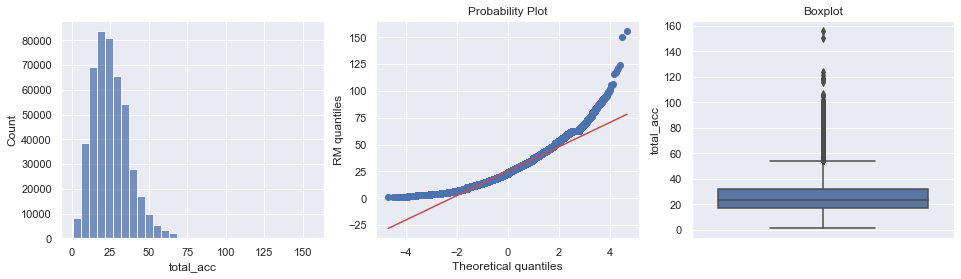

out_prncp


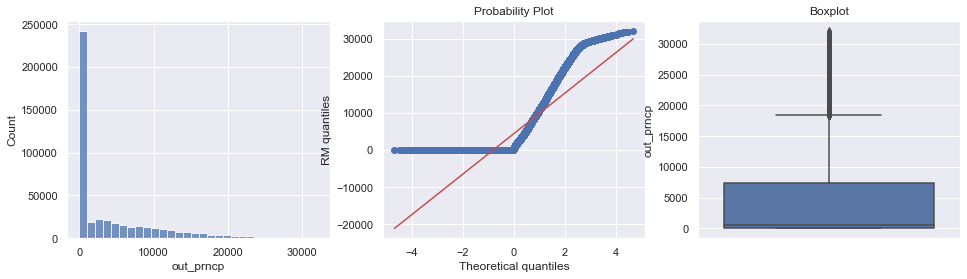

out_prncp_inv


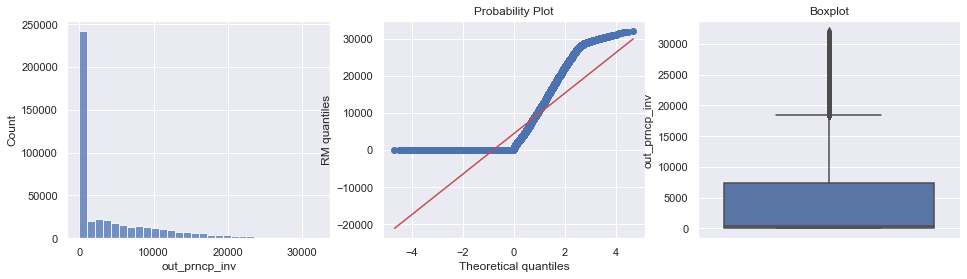

total_pymnt


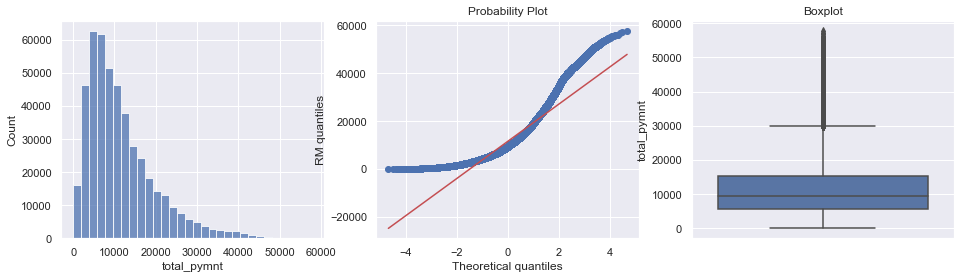

total_pymnt_inv


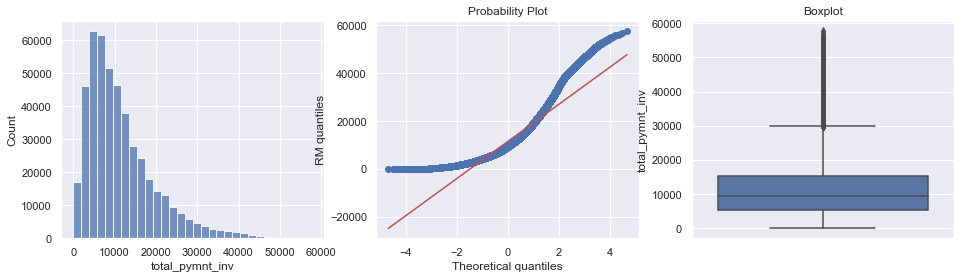

total_rec_prncp


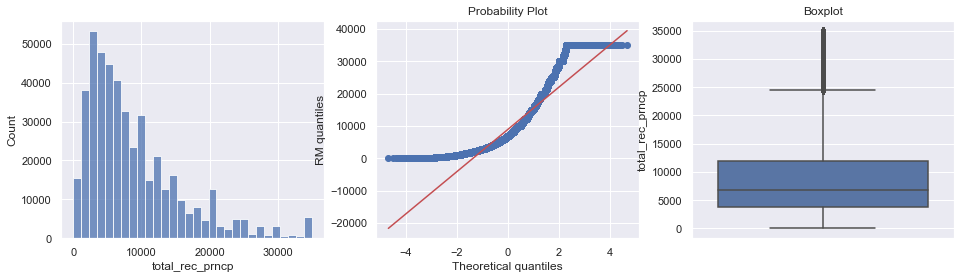

total_rec_int


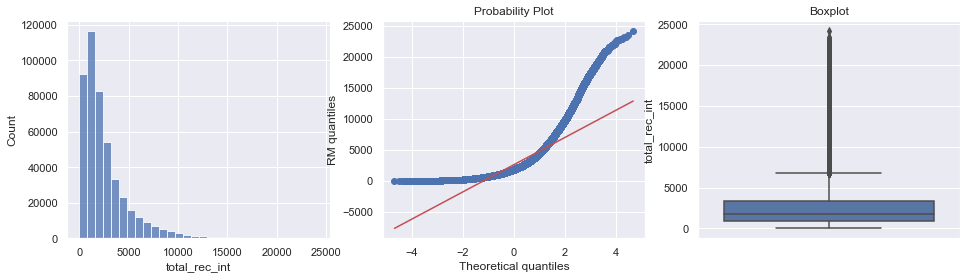

total_rec_late_fee


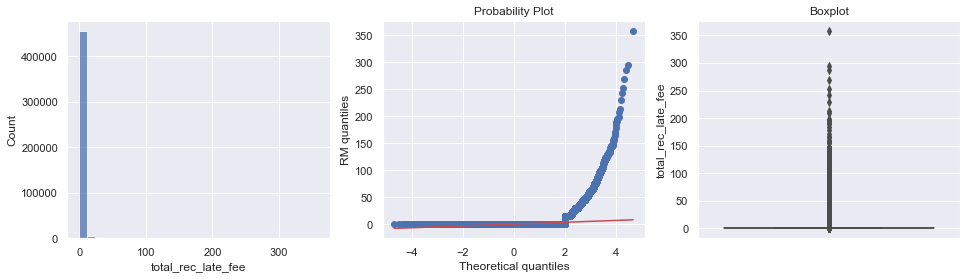

recoveries


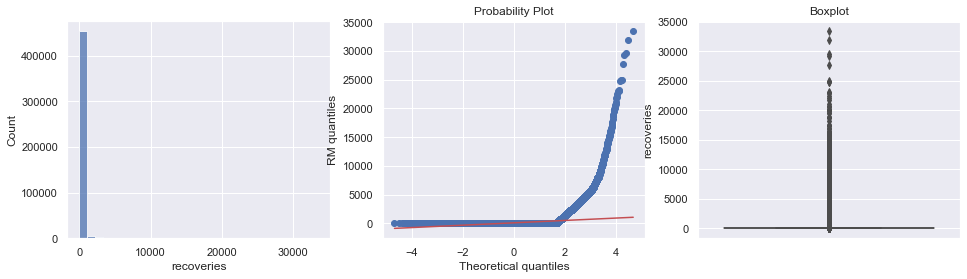

collection_recovery_fee


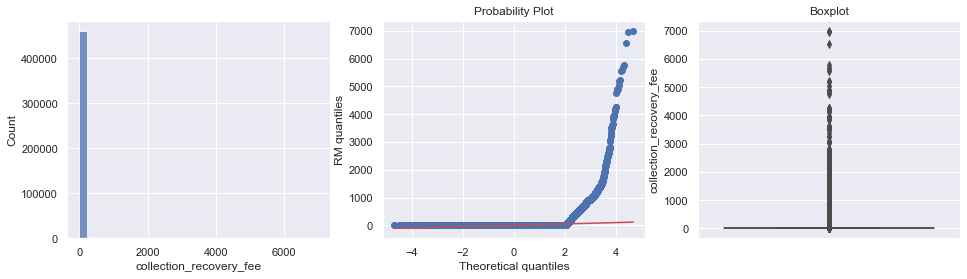

last_pymnt_amnt


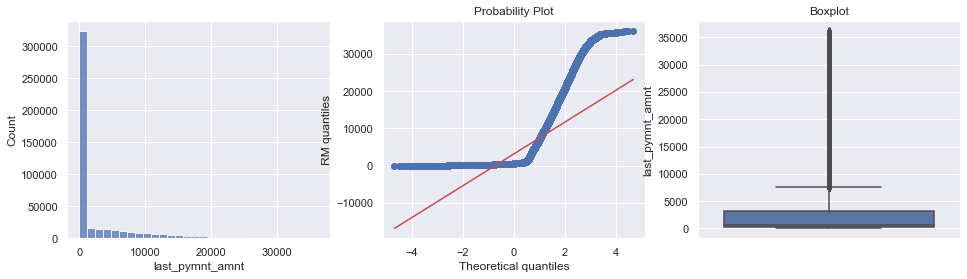

collections_12_mths_ex_med


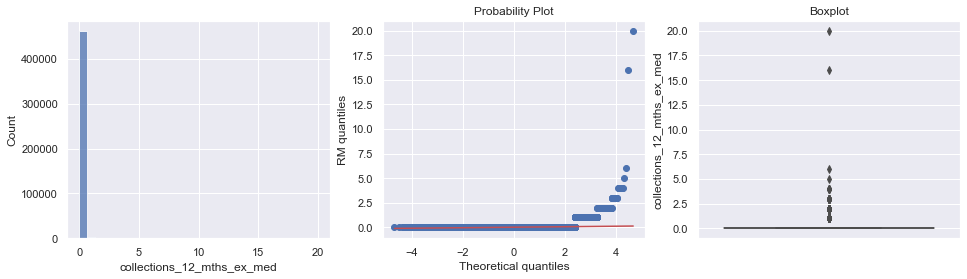

acc_now_delinq


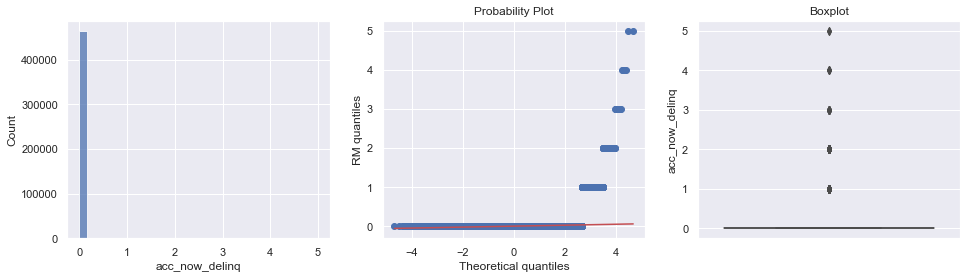

tot_coll_amt


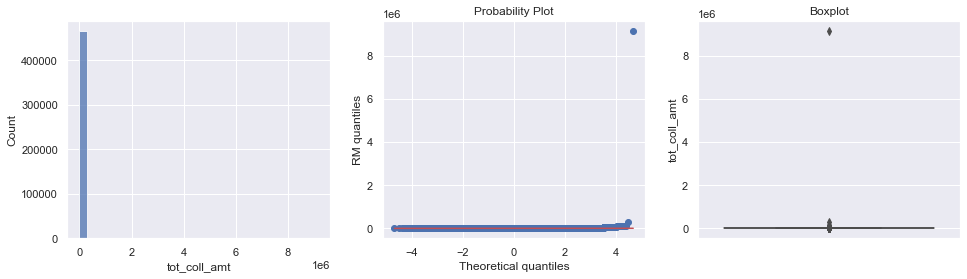

tot_cur_bal


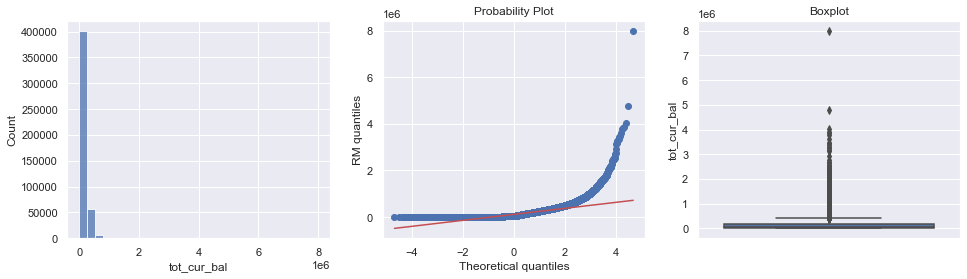

total_rev_hi_lim


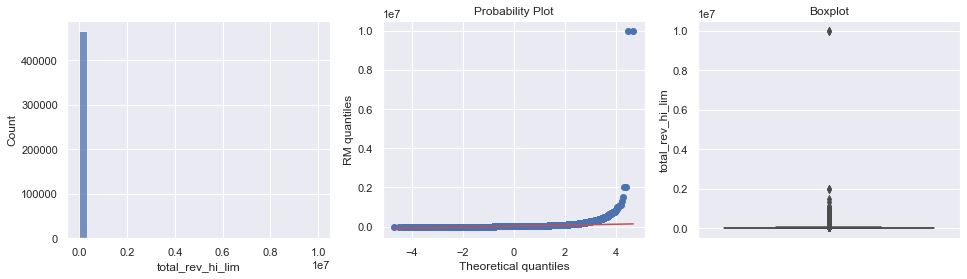

term_month


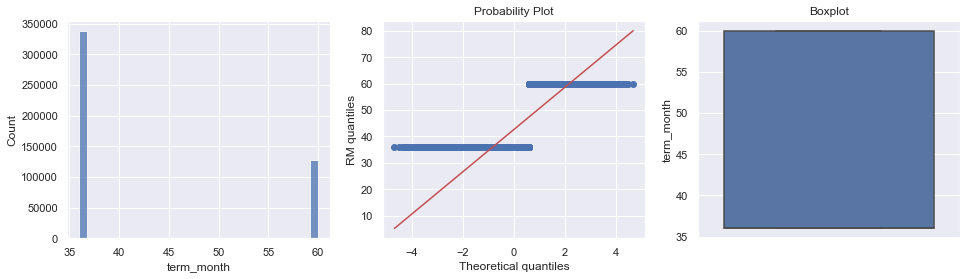

In [119]:
for col in numerikal:
    print(col)
    diagnostic_plots(loan_data, col)

In [120]:
outliers = [
    'int_rate',
    'installment',
    'annual_inc',
    'delinq_2yrs',
    'inq_last_6mths',
    'open_acc',
    'pub_rec',
    'revol_bal',
    'revol_util',
    'total_acc',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_amnt',
    'collections_12_mths_ex_med',
    'acc_now_delinq',
    'tot_coll_amt',
    'tot_cur_bal',
    'total_rev_hi_lim'
]

### Using windsorizer for treat outliers

In [121]:
loan_data.shape

(465819, 45)

In [122]:
wnsz = Winsorizer(capping_method='gaussian',
                  tail='both',
                  variables=outliers)
wnsz.fit(loan_data)

Winsorizer(tail='both',
           variables=['int_rate', 'installment', 'annual_inc', 'delinq_2yrs',
                      'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
                      'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
                      'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                      'total_rec_int', 'total_rec_late_fee', 'recoveries',
                      'collection_recovery_fee', 'last_pymnt_amnt',
                      'collections_12_mths_ex_med', 'acc_now_delinq',
                      'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'])

In [123]:
loan_data = wnsz.transform(loan_data)

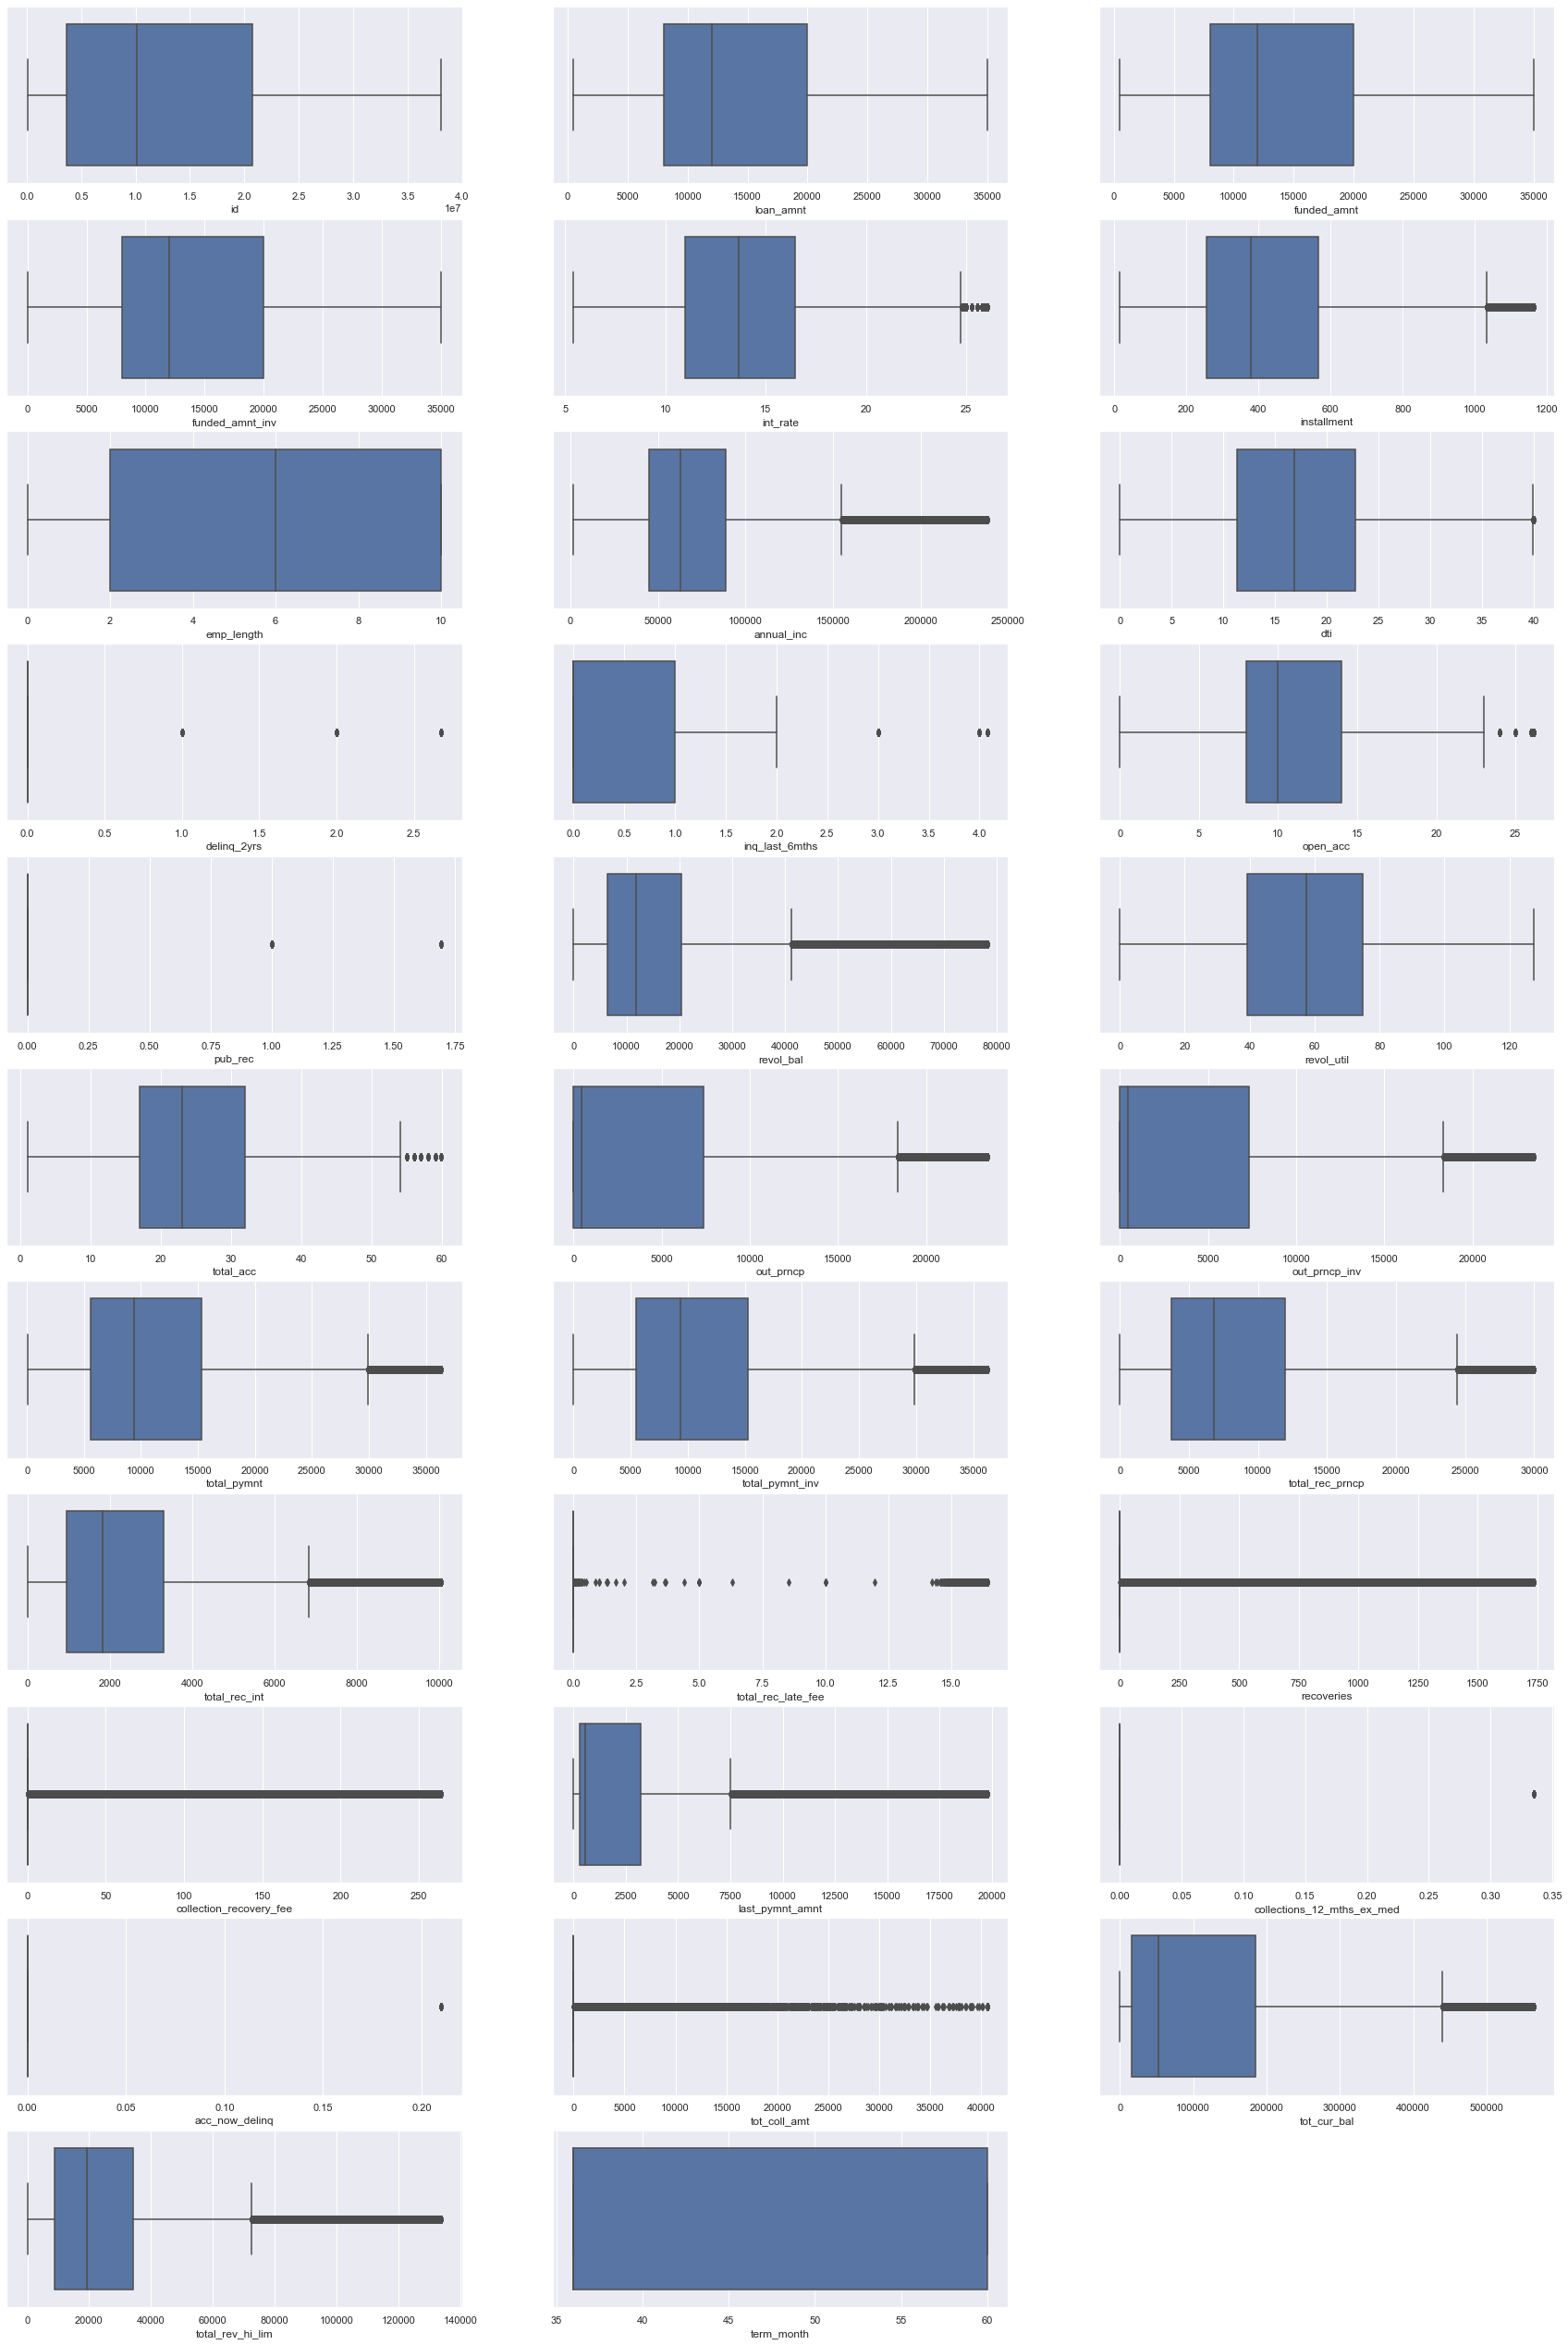

In [124]:
plt.figure(figsize=(30,50))
for i in range(len(numerikal)):
    plt.subplot(12,3,i+1)
    sns.boxplot(loan_data[numerikal[i]])
    plt.tight_layout
plt.show()

id


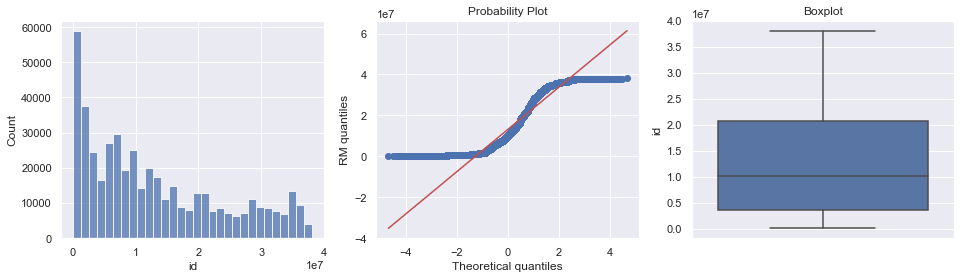

loan_amnt


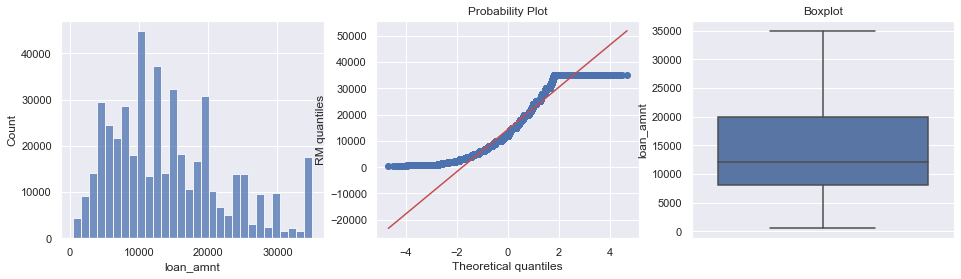

funded_amnt


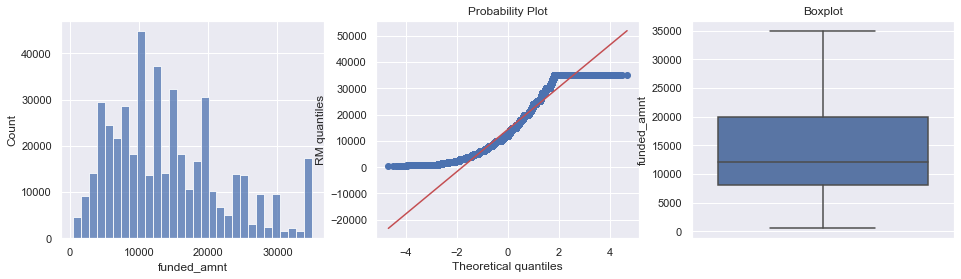

funded_amnt_inv


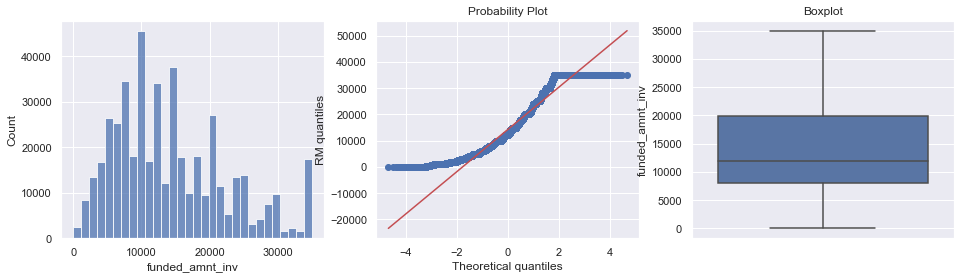

int_rate


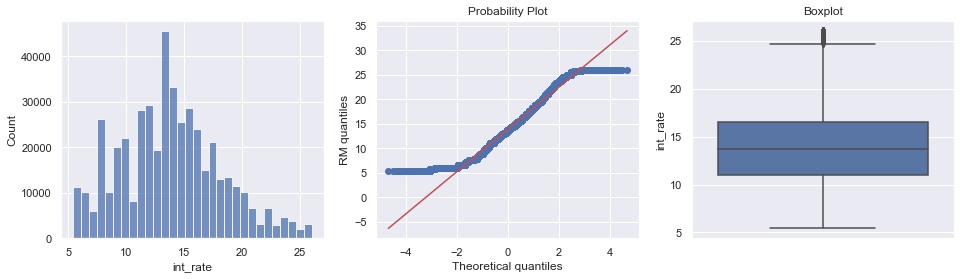

installment


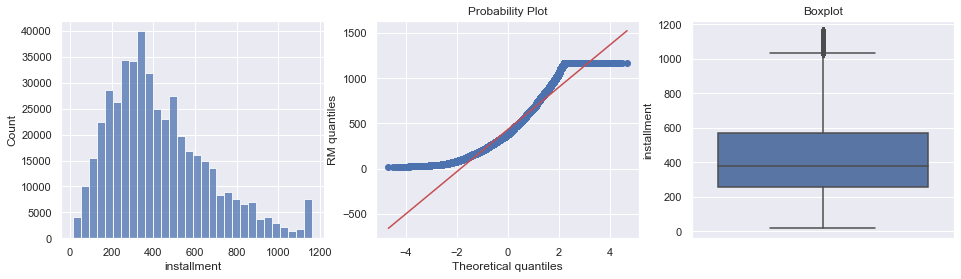

emp_length


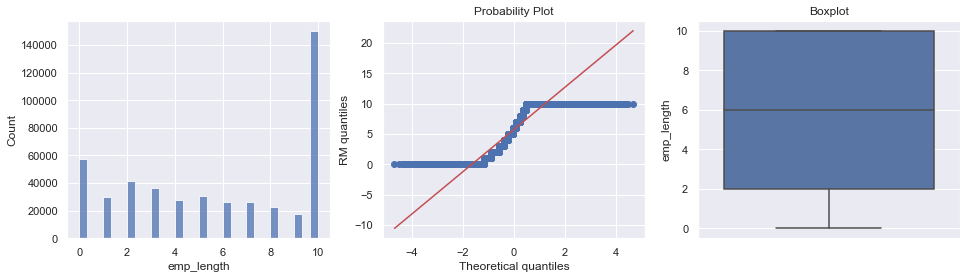

annual_inc


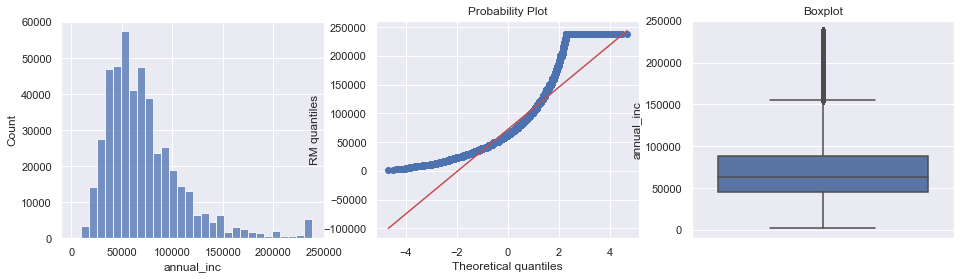

dti


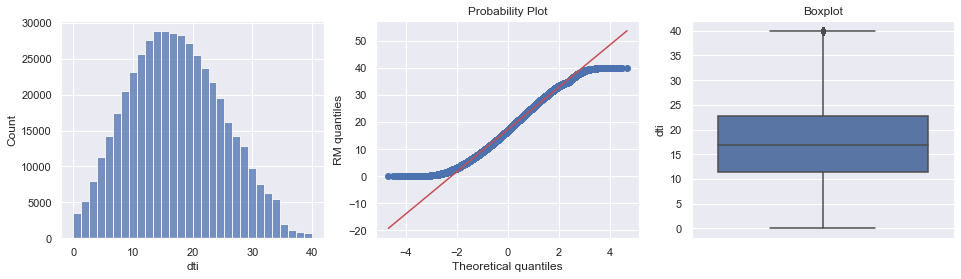

delinq_2yrs


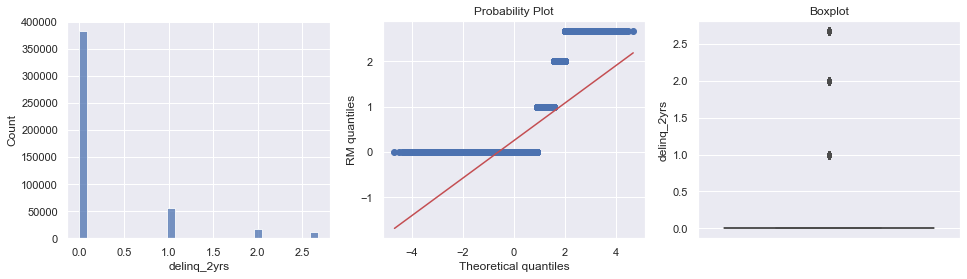

inq_last_6mths


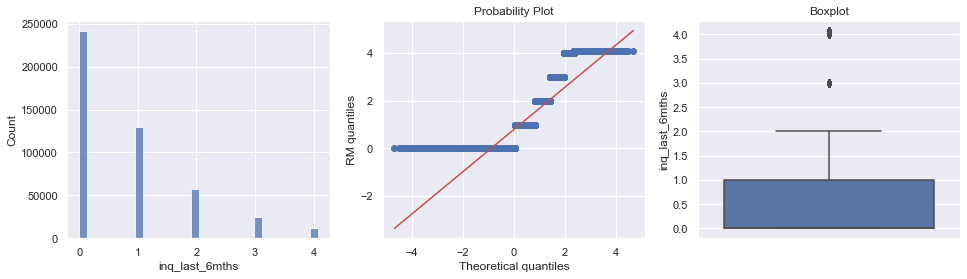

open_acc


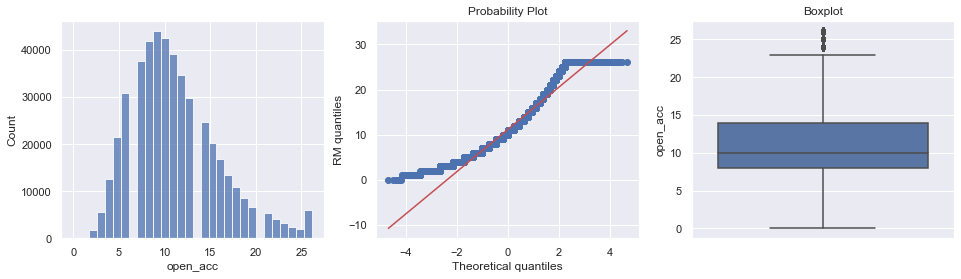

pub_rec


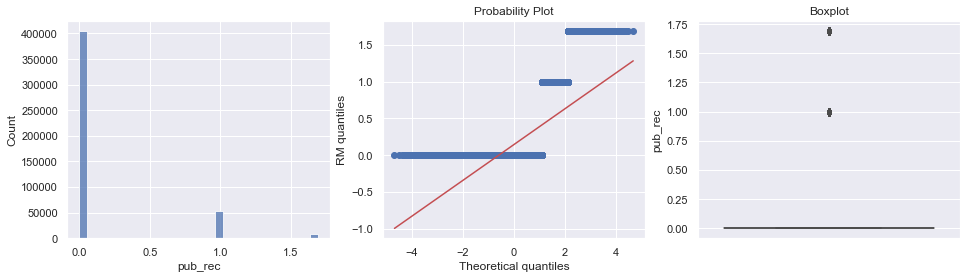

revol_bal


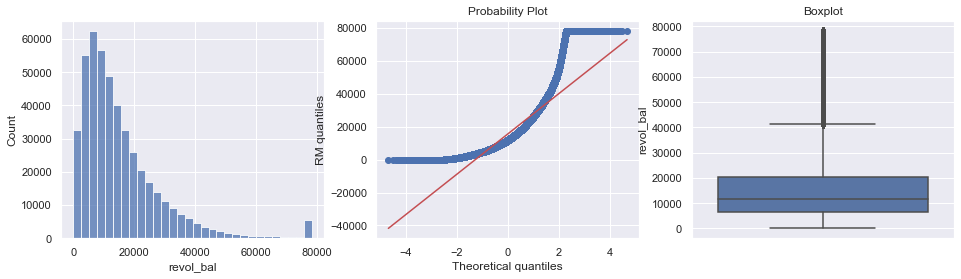

revol_util


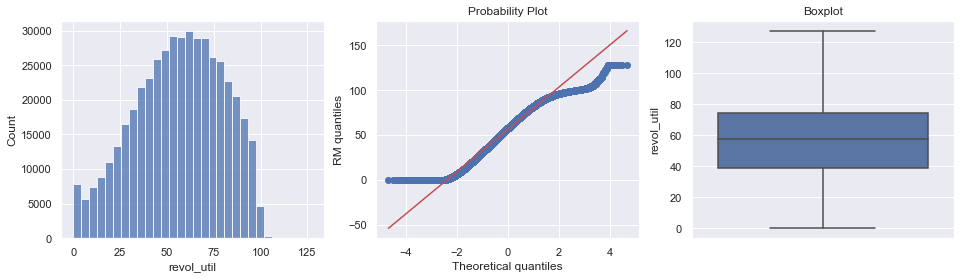

total_acc


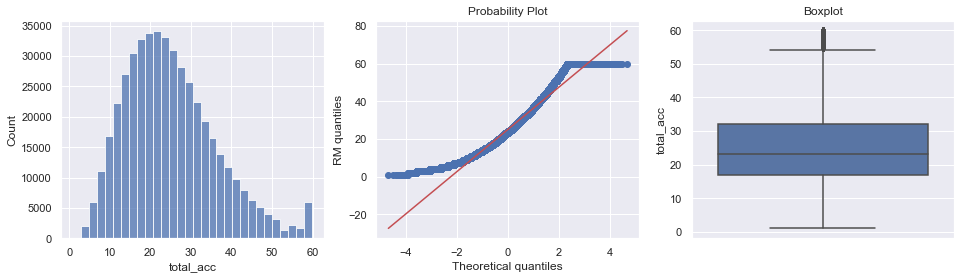

out_prncp


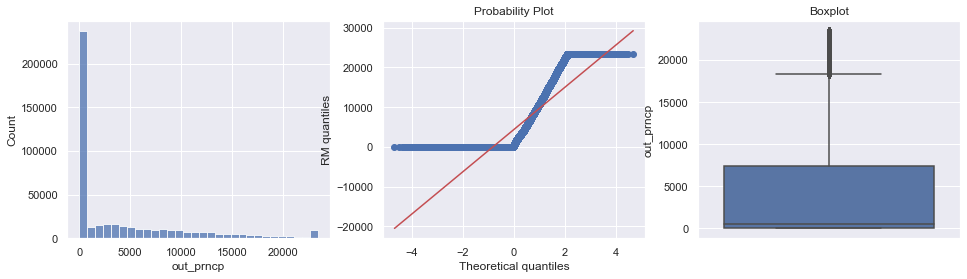

out_prncp_inv


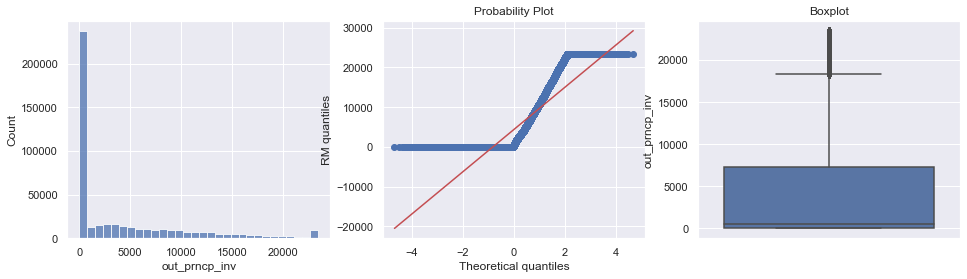

total_pymnt


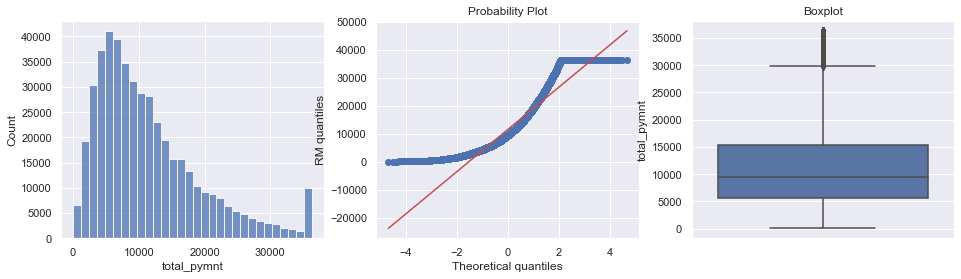

total_pymnt_inv


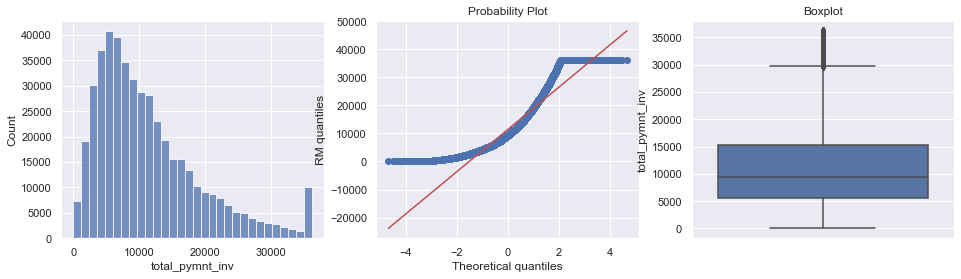

total_rec_prncp


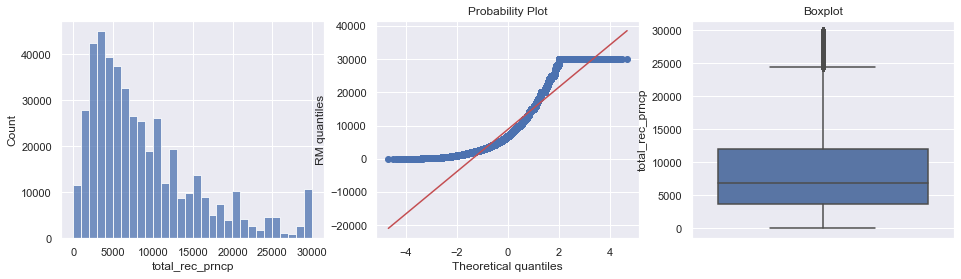

total_rec_int


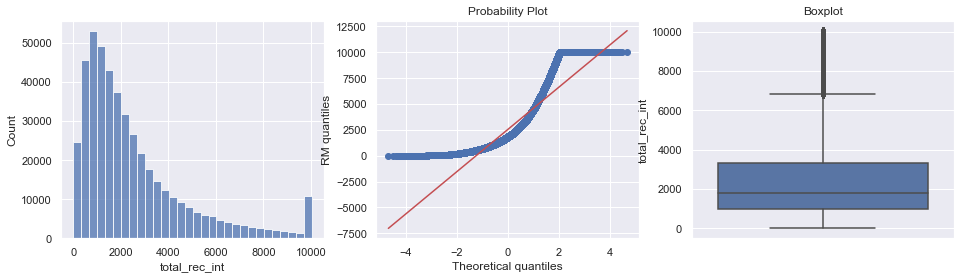

total_rec_late_fee


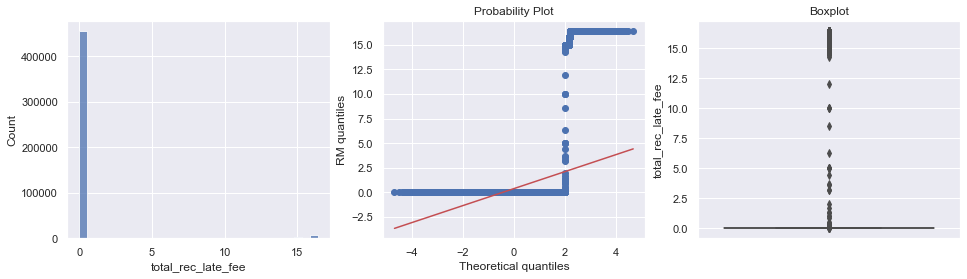

recoveries


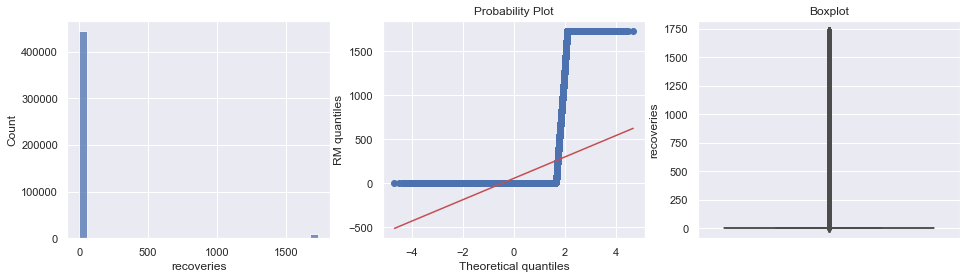

collection_recovery_fee


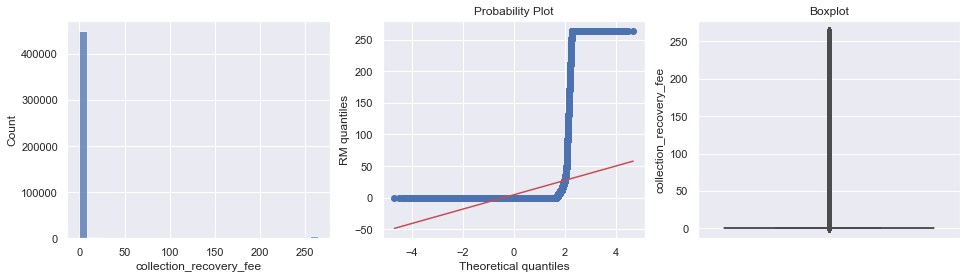

last_pymnt_amnt


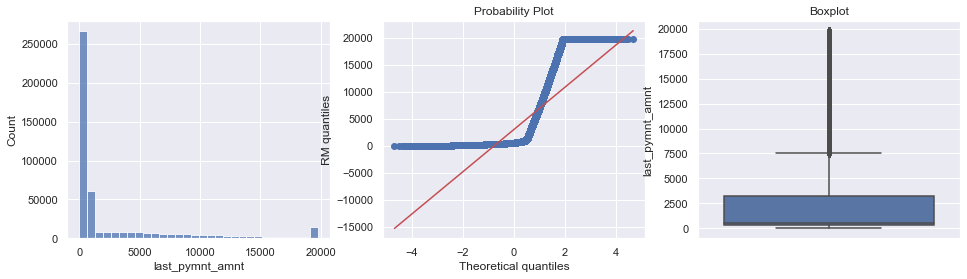

collections_12_mths_ex_med


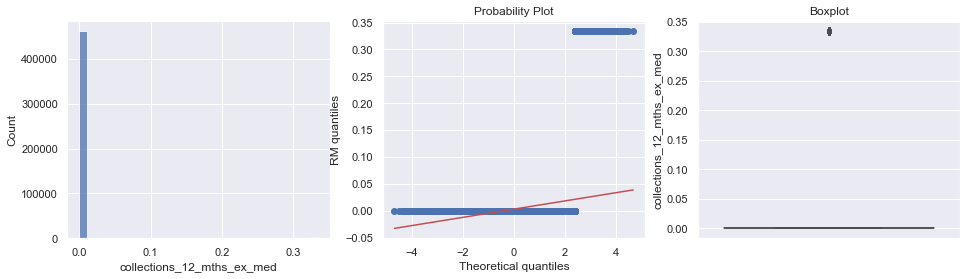

acc_now_delinq


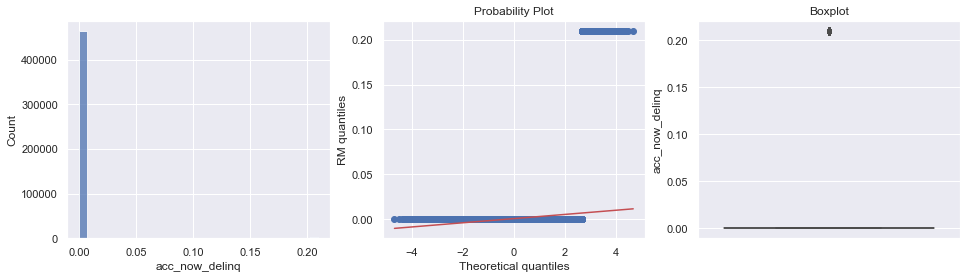

tot_coll_amt


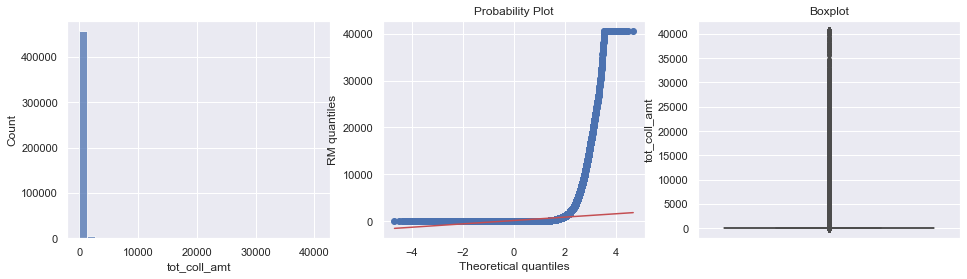

tot_cur_bal


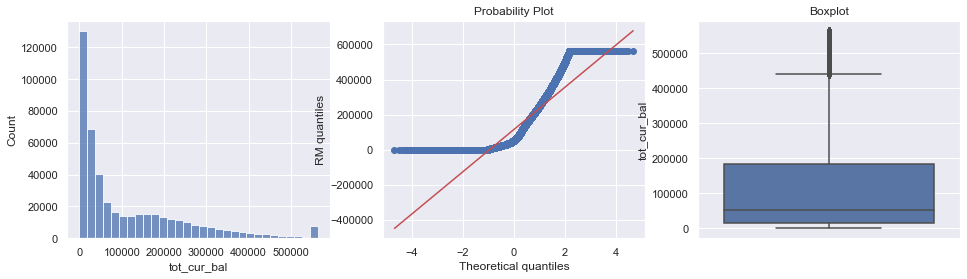

total_rev_hi_lim


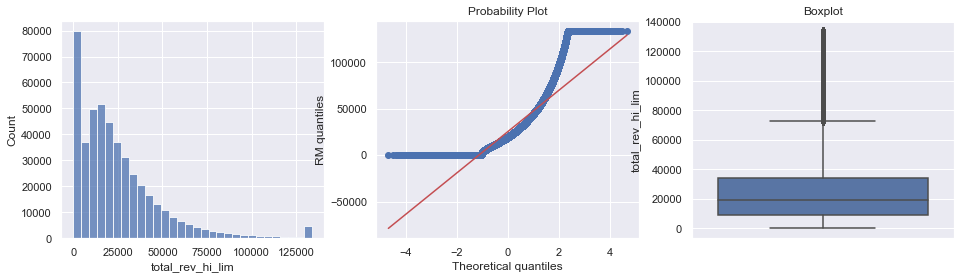

term_month


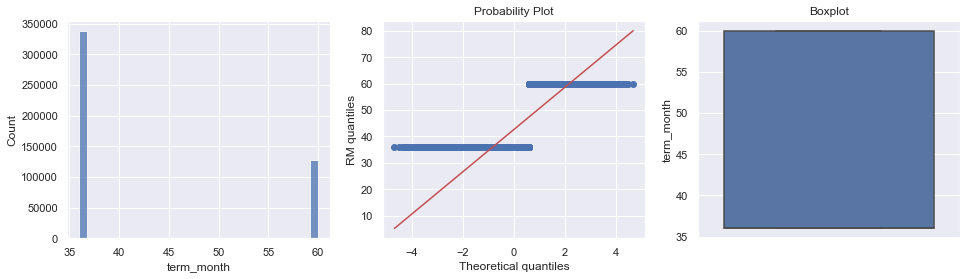

In [125]:
for col in numerikal:
    print(col)
    diagnostic_plots(loan_data, col)

# Transform Date to integer

Handling value yang aneh

In [126]:
loan_data.max() 

id                                             38098114
loan_amnt                                         35000
funded_amnt                                       35000
funded_amnt_inv                                 35000.0
int_rate                                          26.06
installment                                 1162.511304
grade                                                 G
emp_length                                         10.0
home_ownership                                     RENT
annual_inc                                238210.791128
verification_status                            Verified
issue_d                             2014-12-01 00:00:00
loan_status                          Late (31-120 days)
pymnt_plan                                            y
purpose                                         wedding
title                         îîMY FIRST CAR îî
addr_state                                           WY
dti                                             

Terdapat nilai aneh karena ini adalah loan_status 2007-2014 namun ada data dengan tahun 2068, apalagi variabel pada data tersebut adalah earlist credit line sehingga tidak mungin 2068, maka saya akan handling dengan remove baris tersebut

In [127]:
loan_data.drop(loan_data[loan_data.earliest_cr_line > '2018-12'].index, inplace=True)

In [128]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464652 entries, 0 to 466284
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   id                          464652 non-null  int64         
 1   loan_amnt                   464652 non-null  int64         
 2   funded_amnt                 464652 non-null  int64         
 3   funded_amnt_inv             464652 non-null  float64       
 4   int_rate                    464652 non-null  float64       
 5   installment                 464652 non-null  float64       
 6   grade                       464652 non-null  object        
 7   emp_length                  464652 non-null  float64       
 8   home_ownership              464652 non-null  object        
 9   annual_inc                  464652 non-null  float64       
 10  verification_status         464652 non-null  object        
 11  issue_d                     464652 non-

### Transform

In [129]:
date = loan_data.select_dtypes('datetime64[ns]')
date_var = []
for i in date.columns:
    date_var.append(i)

In [130]:
for col in date_var:
    loan_data[col] = round(pd.to_numeric((pd.to_datetime('2017-12-12') - loan_data[col]) / np.timedelta64(1, 'M')))

# Labeling

Make decision what label to used it

In [131]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

Saya mengasumsikan bahwa permasalahan bisnisnya adalah mengenai klasifikasi mana pelanggan yang bakal bayar tepat waktu dan tidak jadi data dihandling sebagai berikut:
- Drop/Remove
    - Current: belum dapat ditentukan karena pinjaman masih berjalan
    - Default: tidak diketahui mengenai apa default dari loan_status ini
- membayar penuh dan tidak telat (good_status)
    - Fully Paid
    - in grace period = karena masih masa tenggang jadi saya anggap masih masuk good status
- Terlambat / pembayaran macet (bad_status)
    - Charged off
    - Late
    - does not meet the credit policy


In [132]:
loan_data_2 = loan_data.copy() 

Removing Current or default value from loan_status

In [133]:
loan_data_2 = loan_data_2.loc[~loan_data_2['loan_status'].isin(['Default', 'Current'])]

In [134]:
loan_data_2['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [135]:
good = [
    'Fully Paid',
    'In Grace Period'
]
loan_data_2['bad_status'] = np.where(loan_data_2['loan_status'].isin(good), 0, 1)
loan_data_2.drop('loan_status', axis=1, inplace=True)

In [136]:
loan_data_2.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_month,bad_status
0,1077501,5000,5000,4975.0,10.65,162.87,B,10.0,RENT,24000.0,Verified,72.0,n,credit_card,Computer,AZ,27.65,0.0,395.0,1.000000,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.000000,0.00,0.00,35.0,171.62,23.0,0.0,0.0,0.0,0.0,0.0,36,0
1,1077430,2500,2500,2500.0,15.27,59.83,C,0.0,RENT,30000.0,Source Verified,72.0,n,car,bike,GA,1.00,0.0,224.0,4.078039,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.000000,117.08,1.11,56.0,119.66,51.0,0.0,0.0,0.0,0.0,0.0,60,1
2,1077175,2400,2400,2400.0,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,72.0,n,small_business,real estate business,IL,8.72,0.0,193.0,2.000000,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.000000,0.00,0.00,42.0,649.91,23.0,0.0,0.0,0.0,0.0,0.0,36,0
3,1076863,10000,10000,10000.0,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,72.0,n,other,personel,CA,20.00,0.0,262.0,1.000000,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.445717,0.00,0.00,35.0,357.48,35.0,0.0,0.0,0.0,0.0,0.0,36,0
5,1075269,5000,5000,5000.0,7.90,156.46,A,3.0,RENT,36000.0,Source Verified,72.0,n,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,157.0,3.000000,9.0,0.0,7963.0,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.000000,0.00,0.00,35.0,161.03,27.0,0.0,0.0,0.0,0.0,0.0,36,0


In [138]:
loan_data_ds = loan_data_2.copy()

# Feature Selection

In [158]:
loan_data_2.nunique()

id                            240270
loan_amnt                       1310
int_rate                         505
installment                    43540
grade                              7
emp_length                        11
home_ownership                     6
annual_inc                     18431
verification_status                3
issue_d                           91
pymnt_plan                         2
purpose                           14
title                          49925
addr_state                        50
dti                             3917
delinq_2yrs                        4
earliest_cr_line                 515
inq_last_6mths                     6
open_acc                          28
pub_rec                            3
revol_bal                      44042
revol_util                      1193
total_acc                         60
initial_list_status                2
out_prncp                      10171
out_prncp_inv                  10205
total_pymnt                   221324
t

### categorical features

### CHI-Square

In [204]:
cat = loan_data_2.select_dtypes('object')
categorical = []
for col in cat:
    categorical.append(col)

In [205]:
numbutcat = [
    'delinq_2yrs',
    'inq_last_6mths',
    'pub_rec',
    'collections_12_mths_ex_med',
    'acc_now_delinq',
    'term_month',
    'bad_status'
]

In [207]:
for col in categorical:
    print(col,': ', loan_data_2[col].nunique())

grade :  7
home_ownership :  6
verification_status :  3
pymnt_plan :  2
purpose :  14
title :  49925
addr_state :  50
initial_list_status :  2


title cant using cz so many uniq value but categorical data

In [184]:
categorical = categorical + numbutcat

In [185]:
categorical

['grade',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'title',
 'addr_state',
 'initial_list_status',
 'delinq_2yrs',
 'inq_last_6mths',
 'pub_rec',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'term_month',
 'bad_status']

In [198]:
data_cat = loan_data_2[categorical].apply(preprocessing.LabelEncoder().fit_transform)

In [199]:
data_cat

,grade,home_ownership,verification_status,pymnt_plan,purpose,title,addr_state,initial_list_status,delinq_2yrs,inq_last_6mths,pub_rec,collections_12_mths_ex_med,acc_now_delinq,term_month,bad_status
0,1,5,2,0,1,7070,3,0,0,1,0,0,0,0,0
1,2,5,1,0,0,39841,10,0,0,5,0,0,0,1,1
2,2,5,0,0,11,48067,14,0,0,2,0,0,0,0,0
3,2,5,1,0,9,47817,4,0,0,1,0,0,0,0,0
5,0,5,1,0,13,26763,3,0,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,3,1,2,0,7,25277,19,0,3,0,0,0,0,1,1
466277,0,5,2,0,2,46211,20,0,1,0,0,0,0,0,1
466278,3,5,1,0,12,38218,44,0,0,0,0,0,0,0,0
466281,3,1,2,0,2,13139,41,0,0,5,1,0,0,1,1


In [200]:
x = data_cat.drop(['bad_status', 'title'], axis=1)
y = data_cat['bad_status']

In [201]:
chi_scores = chi2(x,y)

<AxesSubplot:>

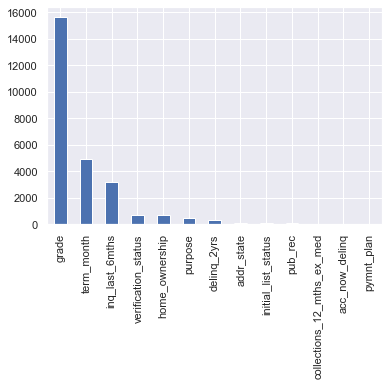

In [214]:
# Higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=x.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

In [215]:
chi_values

grade                         15631.968164
term_month                     4890.031968
inq_last_6mths                 3184.998896
verification_status             672.738580
home_ownership                  671.742653
purpose                         477.082699
delinq_2yrs                     284.999927
addr_state                       88.280908
initial_list_status              87.414477
pub_rec                          45.809081
collections_12_mths_ex_med       27.302046
acc_now_delinq                   18.380206
pymnt_plan                        9.992607
dtype: float64

In [216]:
cat_select = [
    'grade',
    'term_month',
    'inq_last_6mths',
    'verification_status',
    'home_ownership',
    'purpose'
]

### Numerikal

In [147]:
num = loan_data_2.select_dtypes('number')
numerikal = []
for i in num.columns:
    numerikal.append(i)

<AxesSubplot:>

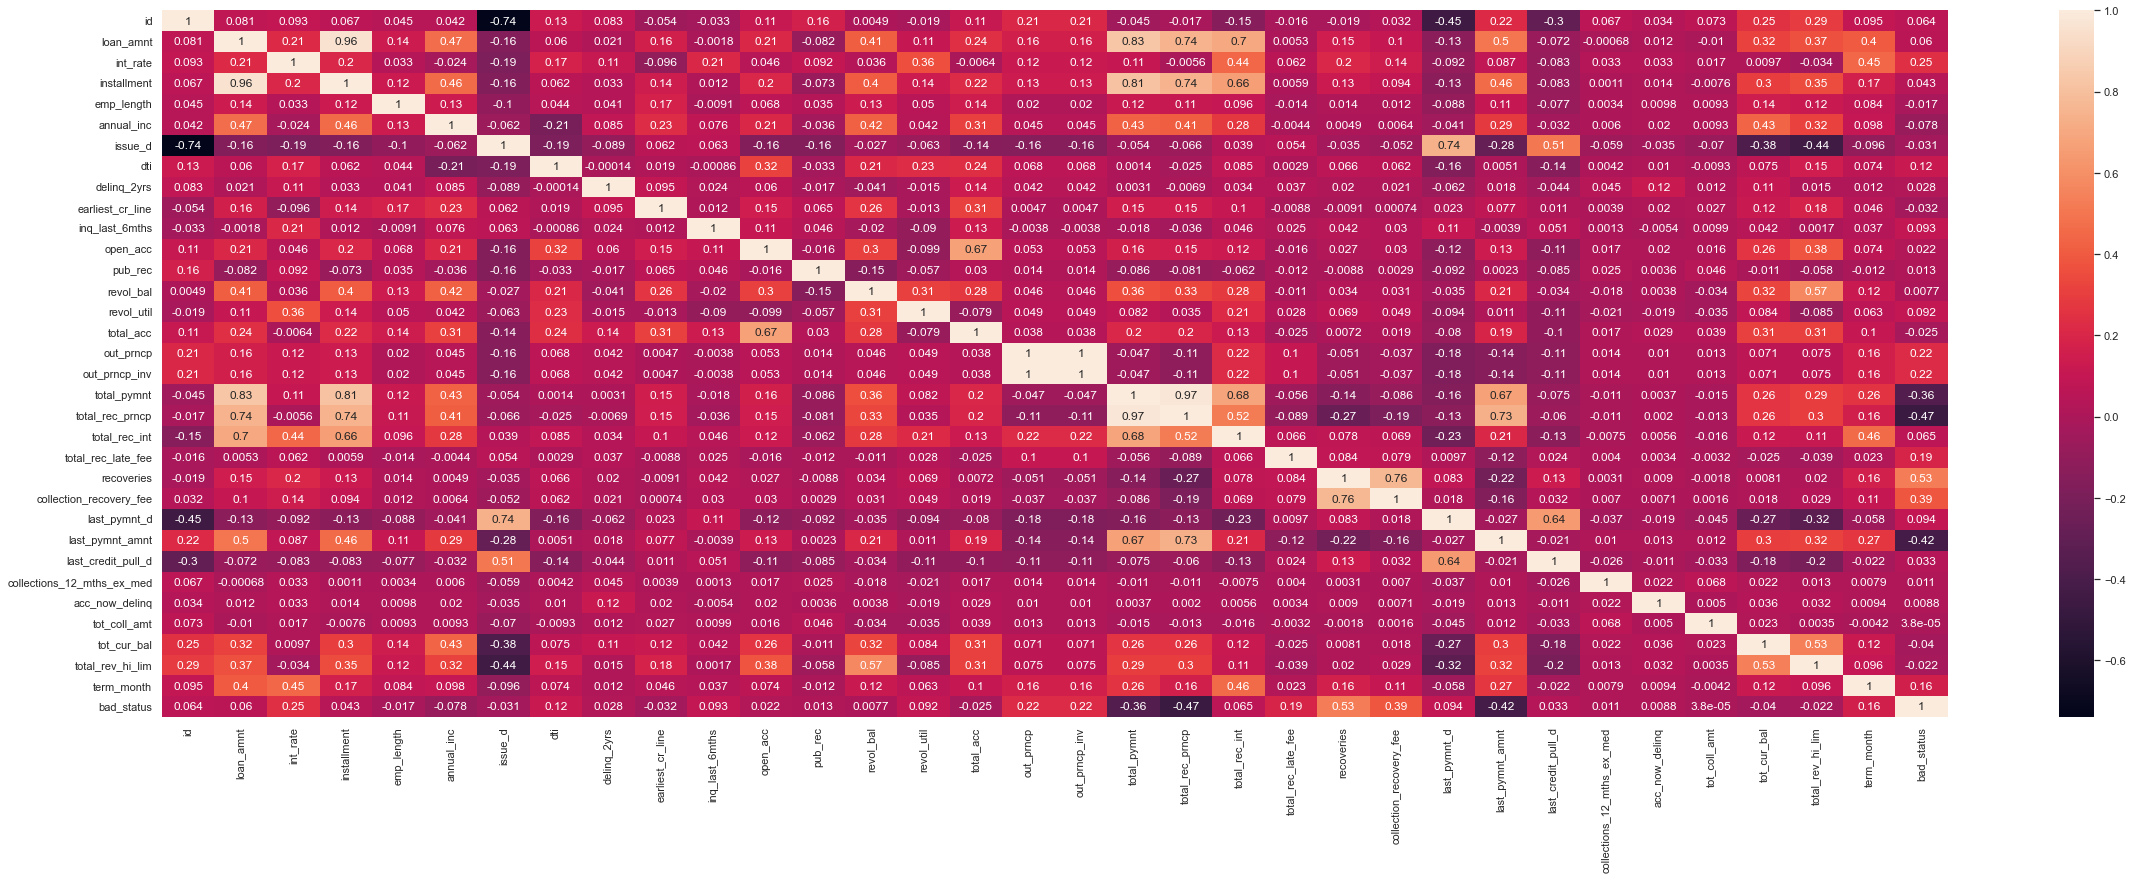

In [153]:
sns.set(rc = {'figure.figsize':(40,13)})
sns.heatmap(loan_data_2[numerikal].corr(), annot=True)

drop kolom yang memiliki korelasi bernilai satu 

In [144]:
# karena kolom dianggap similiar maka drop
sim_col = [
    'funded_amnt',
    'funded_amnt_inv',
    'total_pymnt_inv'
]

In [145]:
loan_data_2.drop(sim_col, axis=1, inplace=True)

In [152]:
num = loan_data_2.select_dtypes('number')
numerikal = []
for i in num.columns:
    numerikal.append(i)

In [141]:
loan_data_2[numerikal].corr()['bad_status'].sort_values(ascending=False)

bad_status                    1.000000
recoveries                    0.529699
collection_recovery_fee       0.388277
int_rate                      0.245469
out_prncp                     0.224982
out_prncp_inv                 0.224973
total_rec_late_fee            0.188231
term_month                    0.161617
dti                           0.116507
last_pymnt_d                  0.094290
inq_last_6mths                0.093430
revol_util                    0.092321
total_rec_int                 0.065482
id                            0.064387
loan_amnt                     0.059743
funded_amnt                   0.059606
funded_amnt_inv               0.052310
installment                   0.042518
last_credit_pull_d            0.033165
delinq_2yrs                   0.027775
open_acc                      0.022209
pub_rec                       0.013049
collections_12_mths_ex_med    0.010690
acc_now_delinq                0.008758
revol_bal                     0.007666
tot_coll_amt             

<AxesSubplot:>

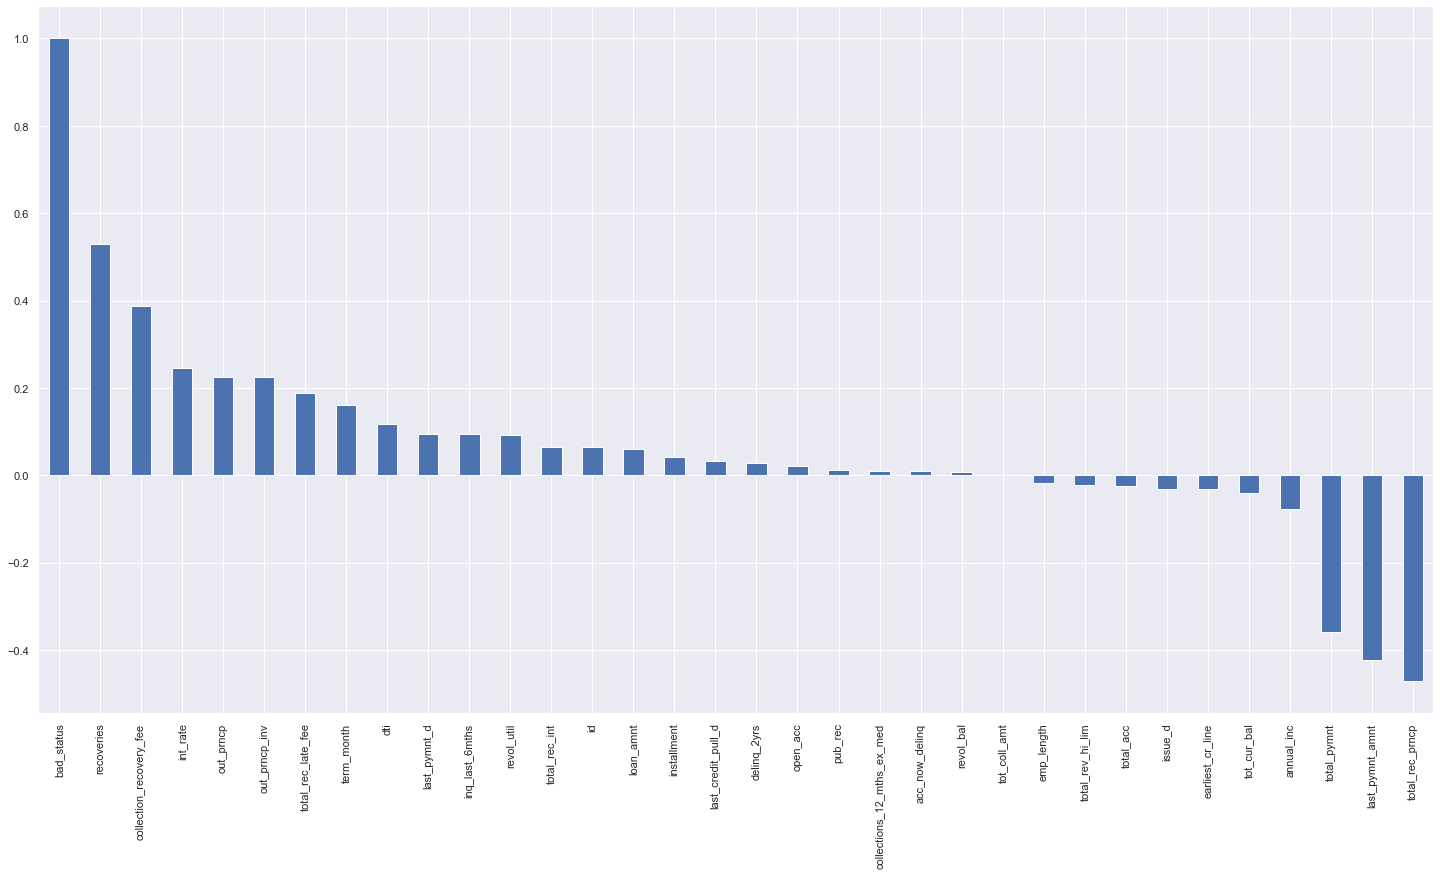

In [155]:
plt.figure(figsize=(25,13))
loan_data_2[numerikal].corr()['bad_status'].sort_values(ascending = False).plot(kind='bar') 

In [154]:
loan_data_2[numerikal].corr()['bad_status'].sort_values(ascending=False)

bad_status                    1.000000
recoveries                    0.529699
collection_recovery_fee       0.388277
int_rate                      0.245469
out_prncp                     0.224982
out_prncp_inv                 0.224973
total_rec_late_fee            0.188231
term_month                    0.161617
dti                           0.116507
last_pymnt_d                  0.094290
inq_last_6mths                0.093430
revol_util                    0.092321
total_rec_int                 0.065482
id                            0.064387
loan_amnt                     0.059743
installment                   0.042518
last_credit_pull_d            0.033165
delinq_2yrs                   0.027775
open_acc                      0.022209
pub_rec                       0.013049
collections_12_mths_ex_med    0.010690
acc_now_delinq                0.008758
revol_bal                     0.007666
tot_coll_amt                  0.000038
emp_length                   -0.016906
total_rev_hi_lim         

In [156]:
numeric_select = [
    'bad_status',
    'recoveries',
    'collection_recovery_fee',
    'int_rate',
    'out_prncp',
    'out_prncp_inv',
    'total_rec_prncp',
    'last_pymnt_amnt',
    'total_pymnt'
]

Select feature

In [217]:
feature = cat_select + numeric_select
features = loan_data_2[feature]
features

# Handling duplicated data

In [226]:
features.drop_duplicates(inplace=True)

# Categorical Handling

In [229]:
for col in features:
    print(col,': ', features[col].nunique(), features[col].dtypes)

grade :  7 object
term_month :  2 int32
inq_last_6mths :  6 float64
verification_status :  3 object
home_ownership :  6 object
purpose :  14 object
bad_status :  2 int32
recoveries :  14200 float64
collection_recovery_fee :  14719 float64
int_rate :  505 float64
out_prncp :  10171 float64
out_prncp_inv :  10205 float64
total_rec_prncp :  53003 float64
last_pymnt_amnt :  169266 float64
total_pymnt :  221324 float64


- grade label encoding
- term month one hot
- verification_status  one hot
- home_ownership label encode
- purpose  label encode

In [230]:
onehot = [
    'term_month',
    'verification_status'
]
labelenc = [
    'grade',
    'home_ownership',
    'purpose'
]

In [232]:
# Label Encoding
features[labelenc] = features[labelenc].apply(preprocessing.LabelEncoder().fit_transform)
# onehot
features = pd.get_dummies(features, columns=onehot)

In [233]:
features

,grade,inq_last_6mths,home_ownership,purpose,bad_status,recoveries,collection_recovery_fee,int_rate,out_prncp,out_prncp_inv,total_rec_prncp,last_pymnt_amnt,total_pymnt,term_month_36,term_month_60,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,1,1.000000,5,1,0,0.00,0.000,10.65,0.0,0.0,5000.00,171.62,5861.071414,1,0,0,0,1
1,2,4.078039,5,0,1,117.08,1.110,15.27,0.0,0.0,456.46,119.66,1008.710000,0,1,0,1,0
2,2,2.000000,5,11,0,0.00,0.000,15.96,0.0,0.0,2400.00,649.91,3003.653644,1,0,1,0,0
3,2,1.000000,5,9,0,0.00,0.000,13.49,0.0,0.0,10000.00,357.48,12226.302210,1,0,0,1,0
5,0,3.000000,5,13,0,0.00,0.000,7.90,0.0,0.0,5000.00,161.03,5631.377753,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,3,0.000000,1,7,1,1159.40,11.594,18.25,0.0,0.0,360.08,217.65,2029.930000,0,1,0,0,1
466277,0,0.000000,5,2,1,0.00,0.000,7.90,0.0,0.0,4580.89,563.23,5631.670000,1,0,0,0,1
466278,3,0.000000,5,12,0,0.00,0.000,18.25,0.0,0.0,10000.00,5501.60,12394.165200,1,0,0,1,0
466281,3,4.078039,1,2,1,0.00,0.000,19.97,0.0,0.0,1837.04,17.50,4677.920000,0,1,0,0,1


# check data balance or not

In [234]:
features['bad_status'].value_counts()

0    185611
1     52754
Name: bad_status, dtype: int64

([<matplotlib.patches.Wedge at 0x1d99412d430>,
 [Text(-0.84465838674731, 0.7046646079500742, 'good'),
  Text(0.8446584197350396, -0.7046645684087612, 'bad')],
 [Text(-0.46072275640762356, 0.38436251342731315, '77.9%'),
  Text(0.4607227744009307, -0.38436249185932425, '22.1%')])

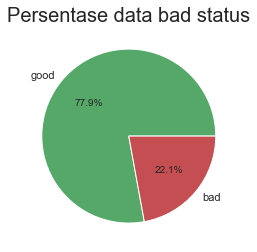

In [235]:
plt.title("Persentase data bad status", fontsize=20)
plt.pie(features['bad_status'].value_counts(), labels=['good', 'bad'],
        autopct='%1.1f%%', colors=['g','r'])

# Modeling

Saya menggunakan model berbasis trees, untuk kali ini saya ingin melihat yang terbak dari decision tree dan random forest

Split features and label

In [242]:
x = features.drop('bad_status', axis=1)
y = features['bad_status']

In [243]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### Build Function

In [246]:
# Function untuk classification report
def clasreport(model, Xtrain, Ytrain, Xtest, Ytest):
    model.fit(Xtrain, Ytrain)
    prediction_test = model.predict(Xtest)
    print(classification_report(Ytest, prediction_test))
 
# Function Evaluation train dan test untuk cek apakah model overfitting atau tidak    
def evaluation_train(model, x, y):
    
    model.fit(x,y)
    prediction_test = model.predict(x)
    confu = metrics.confusion_matrix(y, prediction_test)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confu, display_labels= [False, True])
    cm_display.plot()
    
    print(f'TRAIN {model}')
    print(f'Accuracy Score {model} {accuracy_score(y, prediction_test)}')
    print(f'Recall Score {model} {recall_score(y, prediction_test)}')
    print(f'Precision Score {model} {precision_score(y, prediction_test)}')
    print(f'F1 Score {model} {f1_score(y, prediction_test)}')
    print(f'ROC-AUC Score {model} {roc_auc_score(y, prediction_test)}')
    
    plt.show()
    
def evaluation_test(model,Xtrain, Ytrain, x, y):
    model.fit(Xtrain, Ytrain)
    prediction_test = model.predict(x)
    confu = metrics.confusion_matrix(y, prediction_test)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confu, display_labels= [False, True])
    cm_display.plot()
    
    print(f'TEST {model}')
    print(f'Accuracy Score {model} {accuracy_score(y, prediction_test)}')
    print(f'Recall Score {model} {recall_score(y, prediction_test)}')
    print(f'Precision Score {model} {precision_score(y, prediction_test)}')
    print(f'F1 Score {model} {f1_score(y, prediction_test)}')
    print(f'ROC-AUC Score {model} {roc_auc_score(y, prediction_test)}')
    
    plt.show()

### Model and Matrix

# Decision TREE

In [251]:
clasreport(DecisionTreeClassifier(random_state=1), x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     37074
           1       0.92      0.92      0.92     10599

    accuracy                           0.96     47673
   macro avg       0.95      0.95      0.95     47673
weighted avg       0.96      0.96      0.96     47673



TRAIN DecisionTreeClassifier(random_state=1)
Accuracy Score DecisionTreeClassifier(random_state=1) 0.9999895118830365
Recall Score DecisionTreeClassifier(random_state=1) 0.999952556043174
Precision Score DecisionTreeClassifier(random_state=1) 1.0
F1 Score DecisionTreeClassifier(random_state=1) 0.9999762774588413
ROC-AUC Score DecisionTreeClassifier(random_state=1) 0.9999762780215871


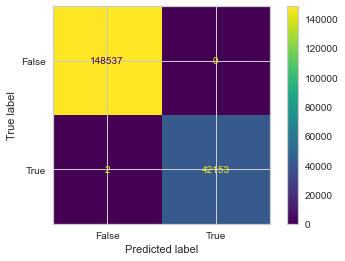

TEST DecisionTreeClassifier(random_state=1)
Accuracy Score DecisionTreeClassifier(random_state=1) 0.9638159964759927
Recall Score DecisionTreeClassifier(random_state=1) 0.9223511652042645
Precision Score DecisionTreeClassifier(random_state=1) 0.9155272522944372
F1 Score DecisionTreeClassifier(random_state=1) 0.9189265403957325
ROC-AUC Score DecisionTreeClassifier(random_state=1) 0.9490107231318835


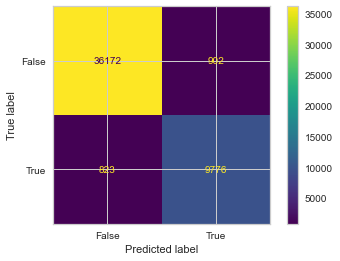

In [252]:
evaluation_train(DecisionTreeClassifier(random_state=1), x_train, y_train)
evaluation_test(DecisionTreeClassifier(random_state=1),x_train, y_train, x_test, y_test)

# RANDOM FOREST

In [247]:
clasreport(RandomForestClassifier(random_state=1), x_train, y_train, x_test, y_test)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     37074
           1       0.94      0.94      0.94     10599

    accuracy                           0.97     47673
   macro avg       0.96      0.96      0.96     47673
weighted avg       0.97      0.97      0.97     47673



TRAIN RandomForestClassifier(random_state=1)
Accuracy Score RandomForestClassifier(random_state=1) 0.9999790237660731
Recall Score RandomForestClassifier(random_state=1) 0.999952556043174
Precision Score RandomForestClassifier(random_state=1) 0.999952556043174
F1 Score RandomForestClassifier(random_state=1) 0.999952556043174
ROC-AUC Score RandomForestClassifier(random_state=1) 0.9999695456922685


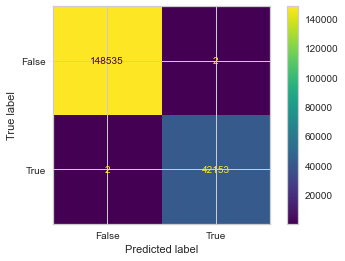

TEST RandomForestClassifier(random_state=1)
Accuracy Score RandomForestClassifier(random_state=1) 0.9730665156377823
Recall Score RandomForestClassifier(random_state=1) 0.9439569770733088
Precision Score RandomForestClassifier(random_state=1) 0.9354838709677419
F1 Score RandomForestClassifier(random_state=1) 0.9397013243167089
ROC-AUC Score RandomForestClassifier(random_state=1) 0.9626727756381271


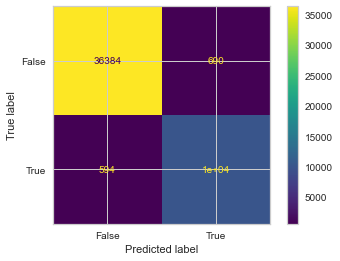

In [250]:
evaluation_train(RandomForestClassifier(random_state=1), x_train, y_train)
evaluation_test(RandomForestClassifier(random_state=1),x_train, y_train, x_test, y_test)

F1- Scores dari rf lebih besar

# Result

- karena model yang dibuat memiliki nilai diatas 90% maka termasuk bagus
- modeling yang dipake random forest karena memiliki f1-scores lebih tinggi, alasan kenapa yang jadi patokan f1-scores karena dataset yang dipakai imbalance
- next commit akan saya hyperparameter tuning dan penjelasan apakah model layak dipakai atau tidak